# Modeling 'Oumuamua's orbit

Using the platform Rebound to model 'Oumuamua

In [5]:
# Import necessary libraries
import rebound
import datetime
import scipy.spatial as sp
import numpy as np
import matplotlib.pylab as plt

In [2]:
# Function definitions
def get_coordinates(obj):
    return [obj.x, obj.y, obj.z]
def find_distance(x, y, z):
    return np.sqrt(np.square(x[0] - x[1]) + np.square(y[0] - y[1]) + np.square(z[0] - z[1]))

In [3]:
# Creating the simulation
sim = rebound.Simulation()
sim.units = ['AU', 'hr', 'Msun']
date = '2017-08-14 00:00'
sim.add('Sun', date=date)
sim.add('399', date=date)
sim.add("'Oumuamua", date=date)

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).
Searching NASA Horizons for '399'... Found: Target body name: Earth (399).
Searching NASA Horizons for ''Oumuamua'... Found: Target body name: 1I/'Oumuamua (A/2017 U1).


/home/santiagoginer/.local/lib/python3.9/site-packages/rebound/horizons.py:145: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


In [4]:
sim.G

5.1373647271804e-07

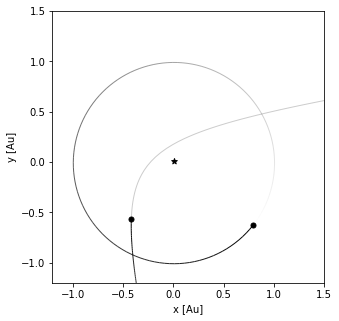

In [5]:
# Plotting the orbit
fig = rebound.OrbitPlot(sim, unitlabel='[Au]', plotparticles=[1, 2], xlim=[-1.2, 1.5], ylim=[-1.2, 1.5])

Text(0, 0.5, 'Distance [AU]')

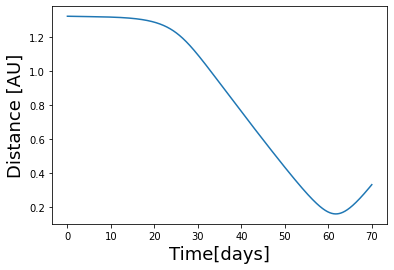

In [6]:
# Labeling each particle
sun = sim.particles[0]
earth = sim.particles[1]
oumuamua = sim.particles[2]

# Integrating the simulation
Noutputs = 70 * 24
times = np.linspace(0, Noutputs, Noutputs)
x = np.zeros((2, Noutputs))
y = np.zeros((2, Noutputs))
z = np.zeros((2, Noutputs))
for i, time in enumerate(times):
    sim.integrate(time)
    x[0][i] = earth.x
    y[0][i] = earth.y
    z[0][i] = earth.z
    x[1][i] = oumuamua.x
    y[1][i] = oumuamua.y
    z[1][i] = oumuamua.z
    
# Calculating and plotting the distances
distance = find_distance(x, y, z)
plt.plot(times / 24, distance)
plt.xlabel('Time[days]', fontsize=18)
plt.ylabel('Distance [AU]', fontsize=18)

In [7]:
# Find the closest approach
closeencounterdistance = np.argmin(distance)
closeencountertime = times[closeencounterdistance]
encounterdate = datetime.datetime(2017, 8, 14) + datetime.timedelta(hours=closeencountertime)
print(distance[closeencounterdistance])
encounterdate.strftime('%Y-%m-%d %H:%M')

0.16067994461911686


'2017-10-14 17:52'

## Changing 'Oumamua's orbit & adding more planets

Begin by getting a record of 'Oumuamua's orbital elements on 2017-08-14

In [8]:
temp_sim = rebound.Simulation()
temp_sim.G = 4 * np.pi ** 2
temp_sim.units = ['AU', 'hr', 'Msun']
date = '2017-08-14 00:00'
temp_sim.add('Sun', date=date)
temp_sim.add("'Oumuamua", date=date)

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).
Searching NASA Horizons for ''Oumuamua'... Found: Target body name: 1I/'Oumuamua (A/2017 U1).


/home/santiagoginer/.local/lib/python3.9/site-packages/rebound/horizons.py:145: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


0.8838414387912014

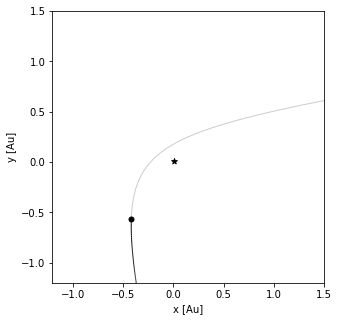

In [9]:
temp_fig = rebound.OrbitPlot(temp_sim, unitlabel='[Au]', xlim=[-1.2, 1.5], ylim=[-1.2, 1.5])
sp.distance.euclidean(get_coordinates(temp_sim.particles[0]), get_coordinates(temp_sim.particles[1]))

In [10]:
OUMUAMUA_ORBIT = temp_sim.particles[1].calculate_orbit()
print(OUMUAMUA_ORBIT)

<rebound.Orbit instance, a=-1.2760099251692525 e=1.2005373686589538 inc=2.1422260358104133 Omega=0.42935143632047995 omega=-2.061405622854081 f=4.4052990308567015>


In [11]:
del temp_sim

#### Adding 'Oumuamua with orbital elements only

In [12]:
# Initialize the simulation
sim2 = rebound.Simulation()
sim2.G = 4 * np.pi ** 2
sim2.units = ['AU', 'hr', 'Msun']
date = '2017-08-14 00:00'
sim2.add('Sun', date=date)

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).


In [13]:
# Add 'Oumuamua's orbit
sim2.add(
    a=OUMUAMUA_ORBIT.a,
    e=OUMUAMUA_ORBIT.e,
    inc=OUMUAMUA_ORBIT.inc,
    Omega=OUMUAMUA_ORBIT.Omega,
    omega=OUMUAMUA_ORBIT.omega,
    f=OUMUAMUA_ORBIT.f
)

0.8838414387912014

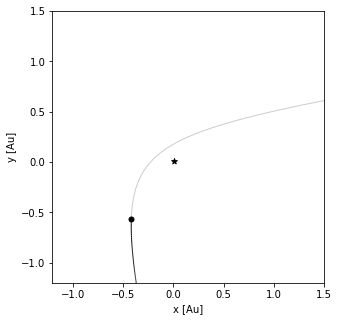

In [14]:
fig2 = rebound.OrbitPlot(sim2, unitlabel='[Au]', xlim=[-1.2, 1.5], ylim=[-1.2, 1.5])
sp.distance.euclidean(get_coordinates(sim2.particles[0]), get_coordinates(sim2.particles[1]))

###  Running many simulations

###  Changing Inclination

In [15]:
def find_closest_approach(simulation, Ndays):
    x = np.zeros((4, Ndays))
    y = np.zeros((4, Ndays))
    z = np.zeros((4, Ndays))

    # Labeling each particle
    mer = simulation.particles[1]
    ven = simulation.particles[2]
    ear = simulation.particles[3]
    oum = simulation.particles[4]

    # Integrating the simulation
    for j, time in enumerate(np.linspace(0, Ndays, Ndays)):
        simulation.integrate(time)
        
        # Save Mercury's coordinates
        x[0][j] = mer.x
        y[0][j] = mer.y
        z[0][j] = mer.z

        # Save Venus's coordinates
        x[1][j] = ven.x
        y[1][j] = ven.y
        z[1][j] = ven.z

        # Save Earth's coordinates
        x[2][j] = ear.x
        y[2][j] = ear.y
        z[2][j] = ear.z

        # Save 'Oumuamua's coordinates
        x[3][j] = oum.x
        y[3][j] = oum.y
        z[3][j] = oum.z

    # Calculating the distances
    mer_oum_distances = np.sqrt(np.square(x[0] - x[3]) + np.square(y[0] - y[3]) + np.square(z[0] - z[3]))
    ven_oum_distances = np.sqrt(np.square(x[1] - x[3]) + np.square(y[1] - y[3]) + np.square(z[1] - z[3]))
    ear_oum_distances = np.sqrt(np.square(x[2] - x[3]) + np.square(y[2] - y[3]) + np.square(z[2] - z[3]))

    # Return closest approach to each object
    return [min(mer_oum_distances), min(ven_oum_distances), min(ear_oum_distances)]

In [16]:
# Months and days at which to start simulation
months = range(6, 13)
days = range(1, 30, 3)

# Angles to iterate through
pi_angles = np.linspace(0, np.pi, 50)

# Number of days to run the simulation
Ndays = 6 * 35

# Arrays to save results
mer_results_inc = np.zeros((1, 3500))
ven_results_inc = np.zeros((1, 3500))
ear_results_inc = np.zeros((1, 3500))


counter = 0
for month in months:
    for day in days:
        for i, inc in enumerate(pi_angles):
            if i == 0:
                # Initialize the simulation
                sim = rebound.Simulation()
                sim.units = ['AU', 'days', 'Msun']
                date = f'2017-{month}-{day} 00:00'
                sim.add('Sun', date=date)
                sim.add('Mercury', date=date)
                sim.add('Venus', date=date)
                sim.add('399', date=date)
                sim.add(
                    a=OUMUAMUA_ORBIT.a,
                    e=OUMUAMUA_ORBIT.e,
                    inc=inc,
                    Omega=OUMUAMUA_ORBIT.Omega,
                    omega=OUMUAMUA_ORBIT.omega,
                    f=OUMUAMUA_ORBIT.f
                )
            else:
                sim.remove(4)
                sim.add(
                    a=OUMUAMUA_ORBIT.a,
                    e=OUMUAMUA_ORBIT.e,
                    inc=inc,
                    Omega=OUMUAMUA_ORBIT.Omega,
                    omega=OUMUAMUA_ORBIT.omega,
                    f=OUMUAMUA_ORBIT.f
                )
            # Find and print closest approaches to each object
            approaches = find_closest_approach(sim, Ndays)
            print(f'Start: {date} | Inclination: {inc}')
            print(f'    Closest approach to Mercury: {approaches[0]}')
            print(f'    Closest approach to Venus: {approaches[1]}')
            print(f'    Closest approach to Earth: {approaches[2]}')
            print('')
            mer_results_inc[0][counter] = approaches[0]
            ven_results_inc[0][counter] = approaches[1]
            ear_results_inc[0][counter] = approaches[2]

            counter += 1

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Target body name: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Target body name: Venus Barycenter (299).
Searching NASA Horizons for '399'... Found: Target body name: Earth (399).
Start: 2017-6-1 00:00 | Inclination: 0.0
    Closest approach to Mercury: 0.5296478503317296
    Closest approach to Venus: 0.040615057955338624
    Closest approach to Earth: 0.7562849887871864

Start: 2017-6-1 00:00 | Inclination: 0.0641141357875468
    Closest approach to Mercury: 0.5214954160532083
    Closest approach to Venus: 1.3252824856244563
    Closest approach to Earth: 0.9763487414846285

Start: 2017-6-1 00:00 | Inclination: 0.1282282715750936
    Closest approach to Mercury: 0.5201402251882
    Closest approach to Venus: 1.3236384797602272
    Closest approach to Earth: 0.9800663442845614

Start: 2017-6-1 00:00 | Inclination: 0.19234240736264038
    C

Start: 2017-6-1 00:00 | Inclination: 2.436337159926778
    Closest approach to Mercury: 0.8755920254858635
    Closest approach to Venus: 0.5473550630874862
    Closest approach to Earth: 1.7411521005825283

Start: 2017-6-1 00:00 | Inclination: 2.500451295714325
    Closest approach to Mercury: 0.8838124855154629
    Closest approach to Venus: 0.5145604032822687
    Closest approach to Earth: 1.7546572783557874

Start: 2017-6-1 00:00 | Inclination: 2.5645654315018716
    Closest approach to Mercury: 0.8914769016104603
    Closest approach to Venus: 0.4821783930650424
    Closest approach to Earth: 1.7669588123471478

Start: 2017-6-1 00:00 | Inclination: 2.6286795672894185
    Closest approach to Mercury: 0.8985683905473304
    Closest approach to Venus: 0.450174793705139
    Closest approach to Earth: 1.7780316254396937

Start: 2017-6-1 00:00 | Inclination: 2.6927937030769655
    Closest approach to Mercury: 0.9050716026849653
    Closest approach to Venus: 0.41947116978557386
    Clos

Start: 2017-6-4 00:00 | Inclination: 1.9234240736264039
    Closest approach to Mercury: 0.7373239930962683
    Closest approach to Venus: 0.8441324453594989
    Closest approach to Earth: 1.5742656898257879

Start: 2017-6-4 00:00 | Inclination: 1.9875382094139507
    Closest approach to Mercury: 0.7469966976579343
    Closest approach to Venus: 0.8130118650918976
    Closest approach to Earth: 1.5967559243515292

Start: 2017-6-4 00:00 | Inclination: 2.0516523452014974
    Closest approach to Mercury: 0.7564155497007999
    Closest approach to Venus: 0.7815294967034062
    Closest approach to Earth: 1.6183170028506617

Start: 2017-6-4 00:00 | Inclination: 2.1157664809890444
    Closest approach to Mercury: 0.7655519153880745
    Closest approach to Venus: 0.7497773349040604
    Closest approach to Earth: 1.6388986939094181

Start: 2017-6-4 00:00 | Inclination: 2.179880616776591
    Closest approach to Mercury: 0.7743788999108069
    Closest approach to Venus: 0.7178587503156901
    Clo

Start: 2017-6-7 00:00 | Inclination: 1.218168579963389
    Closest approach to Mercury: 0.6187316805162251
    Closest approach to Venus: 1.179279824705494
    Closest approach to Earth: 1.2559511784464221

Start: 2017-6-7 00:00 | Inclination: 1.2822827157509358
    Closest approach to Mercury: 0.6248013650644461
    Closest approach to Venus: 1.1563977473340614
    Closest approach to Earth: 1.2850503276624199

Start: 2017-6-7 00:00 | Inclination: 1.3463968515384828
    Closest approach to Mercury: 0.631062869159899
    Closest approach to Venus: 1.1325609998355533
    Closest approach to Earth: 1.3140457187797954

Start: 2017-6-7 00:00 | Inclination: 1.4105109873260295
    Closest approach to Mercury: 0.6374851970022434
    Closest approach to Venus: 1.1078091505761933
    Closest approach to Earth: 1.3428287694519943

Start: 2017-6-7 00:00 | Inclination: 1.4746251231135763
    Closest approach to Mercury: 0.6440375474925188
    Closest approach to Venus: 1.0821846916384832
    Close

Start: 2017-6-10 00:00 | Inclination: 0.5129130863003744
    Closest approach to Mercury: 0.6233234742154332
    Closest approach to Venus: 1.3918628713607404
    Closest approach to Earth: 0.9295588638290109

Start: 2017-6-10 00:00 | Inclination: 0.5770272220879211
    Closest approach to Mercury: 0.6231777215384342
    Closest approach to Venus: 1.3815289139181117
    Closest approach to Earth: 0.9512401778912782

Start: 2017-6-10 00:00 | Inclination: 0.6411413578754679
    Closest approach to Mercury: 0.6232138529770976
    Closest approach to Venus: 1.3699621017025967
    Closest approach to Earth: 0.9746084969123681

Start: 2017-6-10 00:00 | Inclination: 0.7052554936630148
    Closest approach to Mercury: 0.62343168849212
    Closest approach to Venus: 1.357179093848526
    Closest approach to Earth: 0.9994529951544167

Start: 2017-6-10 00:00 | Inclination: 0.7693696294505615
    Closest approach to Mercury: 0.6238301433316445
    Closest approach to Venus: 1.3431984922673925
    

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Target body name: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Target body name: Venus Barycenter (299).
Searching NASA Horizons for '399'... Found: Target body name: Earth (399).
Start: 2017-6-13 00:00 | Inclination: 0.0
    Closest approach to Mercury: 0.31389275866544103
    Closest approach to Venus: 0.23629102763922896
    Closest approach to Earth: 0.7378130730766026

Start: 2017-6-13 00:00 | Inclination: 0.0641141357875468
    Closest approach to Mercury: 0.6956070294303772
    Closest approach to Venus: 1.4583173561828293
    Closest approach to Earth: 0.7993715781710007

Start: 2017-6-13 00:00 | Inclination: 0.1282282715750936
    Closest approach to Mercury: 0.6944143735212884
    Closest approach to Venus: 1.4570126131062453
    Closest approach to Earth: 0.8041177324087139

Start: 2017-6-13 00:00 | Inclination: 0.1923424073626403

Start: 2017-6-13 00:00 | Inclination: 2.8851361104396056
    Closest approach to Mercury: 0.6215107562652978
    Closest approach to Venus: 0.5138193213728777
    Closest approach to Earth: 1.7514248580421135

Start: 2017-6-13 00:00 | Inclination: 2.9492502462271526
    Closest approach to Mercury: 0.6220397842150648
    Closest approach to Venus: 0.4956730060317816
    Closest approach to Earth: 1.7564485926957425

Start: 2017-6-13 00:00 | Inclination: 3.013364382014699
    Closest approach to Mercury: 0.6227360157395376
    Closest approach to Venus: 0.4817780425046657
    Closest approach to Earth: 1.7600426257863924

Start: 2017-6-13 00:00 | Inclination: 3.077478517802246
    Closest approach to Mercury: 0.6235960353885873
    Closest approach to Venus: 0.4725686880508858
    Closest approach to Earth: 1.7622009695083813

Start: 2017-6-13 00:00 | Inclination: 3.141592653589793
    Closest approach to Mercury: 0.6246156408239864
    Closest approach to Venus: 0.46836000312498927
   

Start: 2017-6-16 00:00 | Inclination: 2.436337159926778
    Closest approach to Mercury: 0.578826972838816
    Closest approach to Venus: 0.7566715077902083
    Closest approach to Earth: 1.6610293729092358

Start: 2017-6-16 00:00 | Inclination: 2.500451295714325
    Closest approach to Mercury: 0.5744803382228632
    Closest approach to Venus: 0.7240399797196124
    Closest approach to Earth: 1.6759009999005487

Start: 2017-6-16 00:00 | Inclination: 2.5645654315018716
    Closest approach to Mercury: 0.5705266029266004
    Closest approach to Venus: 0.692380627170026
    Closest approach to Earth: 1.6894319605341692

Start: 2017-6-16 00:00 | Inclination: 2.6286795672894185
    Closest approach to Mercury: 0.5669903914971576
    Closest approach to Venus: 0.6615036709285225
    Closest approach to Earth: 1.7015992545614576

Start: 2017-6-16 00:00 | Inclination: 2.6927937030769655
    Closest approach to Mercury: 0.5638942157282921
    Closest approach to Venus: 0.6324966705158087
    C

Start: 2017-6-19 00:00 | Inclination: 1.6669675304762166
    Closest approach to Mercury: 0.6717627931487659
    Closest approach to Venus: 1.1437687642615313
    Closest approach to Earth: 1.369384573003995

Start: 2017-6-19 00:00 | Inclination: 1.7310816662637634
    Closest approach to Mercury: 0.6609483064872209
    Closest approach to Venus: 1.1178002469579085
    Closest approach to Earth: 1.3979884320672515

Start: 2017-6-19 00:00 | Inclination: 1.7951958020513104
    Closest approach to Mercury: 0.6500695325155688
    Closest approach to Venus: 1.0914233457060123
    Closest approach to Earth: 1.4257322338037441

Start: 2017-6-19 00:00 | Inclination: 1.8593099378388571
    Closest approach to Mercury: 0.6391690361261199
    Closest approach to Venus: 1.064720161614448
    Closest approach to Earth: 1.4525544495096232

Start: 2017-6-19 00:00 | Inclination: 1.9234240736264039
    Closest approach to Mercury: 0.6282916448198677
    Closest approach to Venus: 1.0377795010494801
   

Start: 2017-6-22 00:00 | Inclination: 1.0258261726007487
    Closest approach to Mercury: 0.8244409218676412
    Closest approach to Venus: 1.3931847790433134
    Closest approach to Earth: 1.0249091130888814

Start: 2017-6-22 00:00 | Inclination: 1.0899403083882955
    Closest approach to Mercury: 0.814151309719094
    Closest approach to Venus: 1.375234746659731
    Closest approach to Earth: 1.0582960184073353

Start: 2017-6-22 00:00 | Inclination: 1.1540544441758422
    Closest approach to Mercury: 0.8033427941972644
    Closest approach to Venus: 1.3563560246124193
    Closest approach to Earth: 1.0917457625690197

Start: 2017-6-22 00:00 | Inclination: 1.218168579963389
    Closest approach to Mercury: 0.7920394835296881
    Closest approach to Venus: 1.3365885334134724
    Closest approach to Earth: 1.1251214177625701

Start: 2017-6-22 00:00 | Inclination: 1.2822827157509358
    Closest approach to Mercury: 0.7802673595912244
    Closest approach to Venus: 1.3159753339977758
    

Start: 2017-6-25 00:00 | Inclination: 0.2564565431501872
    Closest approach to Mercury: 0.966135276392968
    Closest approach to Venus: 1.5451310720528937
    Closest approach to Earth: 0.6566979256199343

Start: 2017-6-25 00:00 | Inclination: 0.32057067893773394
    Closest approach to Mercury: 0.9632008093120554
    Closest approach to Venus: 1.5406628586424027
    Closest approach to Earth: 0.6737125225719818

Start: 2017-6-25 00:00 | Inclination: 0.38468481472528077
    Closest approach to Mercury: 0.9594712291923194
    Closest approach to Venus: 1.5350234176686928
    Closest approach to Earth: 0.6938044915451111

Start: 2017-6-25 00:00 | Inclination: 0.4487989505128276
    Closest approach to Mercury: 0.954952648168868
    Closest approach to Venus: 1.528223102542116
    Closest approach to Earth: 0.7166363014388252

Start: 2017-6-25 00:00 | Inclination: 0.5129130863003744
    Closest approach to Mercury: 0.9496525193593338
    Closest approach to Venus: 1.5202744878064285
  

Start: 2017-6-25 00:00 | Inclination: 2.821021974652059
    Closest approach to Mercury: 0.45415460515685535
    Closest approach to Venus: 0.7226167206737335
    Closest approach to Earth: 1.6761403568465447

Start: 2017-6-25 00:00 | Inclination: 2.8851361104396056
    Closest approach to Mercury: 0.4450304254692177
    Closest approach to Venus: 0.702489176591297
    Closest approach to Earth: 1.6828783718447335

Start: 2017-6-25 00:00 | Inclination: 2.9492502462271526
    Closest approach to Mercury: 0.437420937685478
    Closest approach to Venus: 0.685887252513664
    Closest approach to Earth: 1.6881291264908114

Start: 2017-6-25 00:00 | Inclination: 3.013364382014699
    Closest approach to Mercury: 0.4314382808343487
    Closest approach to Venus: 0.6729867146193136
    Closest approach to Earth: 1.6918849728143337

Start: 2017-6-25 00:00 | Inclination: 3.077478517802246
    Closest approach to Mercury: 0.42717581857701903
    Closest approach to Venus: 0.6642740495283211
    C

Start: 2017-6-28 00:00 | Inclination: 2.243994752564138
    Closest approach to Mercury: 0.6057410850361525
    Closest approach to Venus: 1.0292154885385019
    Closest approach to Earth: 1.5268525747882087

Start: 2017-6-28 00:00 | Inclination: 2.3081088883516845
    Closest approach to Mercury: 0.5865636915723197
    Closest approach to Venus: 0.9999502251445017
    Closest approach to Earth: 1.5464155980306706

Start: 2017-6-28 00:00 | Inclination: 2.3722230241392315
    Closest approach to Mercury: 0.5677332795732407
    Closest approach to Venus: 0.9692311521529413
    Closest approach to Earth: 1.5646471458637474

Start: 2017-6-28 00:00 | Inclination: 2.436337159926778
    Closest approach to Mercury: 0.5493668327421245
    Closest approach to Venus: 0.938007679043748
    Closest approach to Earth: 1.5815195794775652

Start: 2017-6-28 00:00 | Inclination: 2.500451295714325
    Closest approach to Mercury: 0.5315917552294563
    Closest approach to Venus: 0.9069034410424102
    C

Start: 2017-7-1 00:00 | Inclination: 1.6669675304762166
    Closest approach to Mercury: 0.822802680470179
    Closest approach to Venus: 1.2707839657892948
    Closest approach to Earth: 1.2692783562523713

Start: 2017-7-1 00:00 | Inclination: 1.7310816662637634
    Closest approach to Mercury: 0.8033214088801494
    Closest approach to Venus: 1.2491244676648872
    Closest approach to Earth: 1.2994234922401755

Start: 2017-7-1 00:00 | Inclination: 1.7951958020513104
    Closest approach to Mercury: 0.7834597343006795
    Closest approach to Venus: 1.227232284618293
    Closest approach to Earth: 1.3285843684831569

Start: 2017-7-1 00:00 | Inclination: 1.8593099378388571
    Closest approach to Mercury: 0.7632727988380312
    Closest approach to Venus: 1.2051871614107514
    Closest approach to Earth: 1.3567083960544692

Start: 2017-7-1 00:00 | Inclination: 1.9234240736264039
    Closest approach to Mercury: 0.7428204505408551
    Closest approach to Venus: 1.1830736768823147
    Clos

Start: 2017-7-4 00:00 | Inclination: 1.1540544441758422
    Closest approach to Mercury: 1.007643546158813
    Closest approach to Venus: 1.4472344807312556
    Closest approach to Earth: 0.9700070099492678

Start: 2017-7-4 00:00 | Inclination: 1.218168579963389
    Closest approach to Mercury: 0.9924423194657597
    Closest approach to Venus: 1.4307046423686829
    Closest approach to Earth: 1.0061059215390165

Start: 2017-7-4 00:00 | Inclination: 1.2822827157509358
    Closest approach to Mercury: 0.9765249056370724
    Closest approach to Venus: 1.413502324073566
    Closest approach to Earth: 1.0417717310589047

Start: 2017-7-4 00:00 | Inclination: 1.3463968515384828
    Closest approach to Mercury: 0.9599227594165075
    Closest approach to Venus: 1.3956746873689956
    Closest approach to Earth: 1.0769081243937058

Start: 2017-7-4 00:00 | Inclination: 1.4105109873260295
    Closest approach to Mercury: 0.9426697743759653
    Closest approach to Venus: 1.3772721610551621
    Close

Start: 2017-7-7 00:00 | Inclination: 0.5129130863003744
    Closest approach to Mercury: 1.1588050909623413
    Closest approach to Venus: 1.5777560346402486
    Closest approach to Earth: 0.578381454683338

Start: 2017-7-7 00:00 | Inclination: 0.5770272220879211
    Closest approach to Mercury: 1.1521193134017436
    Closest approach to Venus: 1.5703791536077472
    Closest approach to Earth: 0.611352395904207

Start: 2017-7-7 00:00 | Inclination: 0.6411413578754679
    Closest approach to Mercury: 1.1445072349434753
    Closest approach to Venus: 1.5620676641259132
    Closest approach to Earth: 0.6457889457759266

Start: 2017-7-7 00:00 | Inclination: 0.7052554936630148
    Closest approach to Mercury: 1.1359818537807223
    Closest approach to Venus: 1.5528410070374215
    Closest approach to Earth: 0.6813384211489326

Start: 2017-7-7 00:00 | Inclination: 0.7693696294505615
    Closest approach to Mercury: 1.1265578936140284
    Closest approach to Venus: 1.5427210386832688
    Clos

    Closest approach to Mercury: 0.5319449649937208
    Closest approach to Venus: 0.8660293481746594
    Closest approach to Earth: 1.5940298064940934

Start: 2017-7-7 00:00 | Inclination: 3.141592653589793
    Closest approach to Mercury: 0.5275832211900585
    Closest approach to Venus: 0.8617005176078755
    Closest approach to Earth: 1.5947895164791548

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Target body name: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Target body name: Venus Barycenter (299).
Searching NASA Horizons for '399'... Found: Target body name: Earth (399).
Start: 2017-7-10 00:00 | Inclination: 0.0
    Closest approach to Mercury: 0.21136523441588492
    Closest approach to Venus: 0.6876242160651331
    Closest approach to Earth: 0.5819812243194161

Start: 2017-7-10 00:00 | Inclination: 0.0641141357875468
    Closest approach to Mercury: 1.2152332172435567
    Clo

Start: 2017-7-10 00:00 | Inclination: 2.3081088883516845
    Closest approach to Mercury: 0.7594997988208481
    Closest approach to Venus: 1.1765570358370865
    Closest approach to Earth: 1.442870185776364

Start: 2017-7-10 00:00 | Inclination: 2.3722230241392315
    Closest approach to Mercury: 0.7404458596594752
    Closest approach to Venus: 1.1550365152059194
    Closest approach to Earth: 1.4612331870552608

Start: 2017-7-10 00:00 | Inclination: 2.436337159926778
    Closest approach to Mercury: 0.7219221298054308
    Closest approach to Venus: 1.127411016123753
    Closest approach to Earth: 1.4782123314813875

Start: 2017-7-10 00:00 | Inclination: 2.500451295714325
    Closest approach to Mercury: 0.704049521094291
    Closest approach to Venus: 1.098915965125996
    Closest approach to Earth: 1.493786161096128

Start: 2017-7-10 00:00 | Inclination: 2.5645654315018716
    Closest approach to Mercury: 0.6865305941821442
    Closest approach to Venus: 1.0706409797374106
    Clos

Start: 2017-7-13 00:00 | Inclination: 2.0516523452014974
    Closest approach to Mercury: 0.8881707039110412
    Closest approach to Venus: 1.27593045415573
    Closest approach to Earth: 1.331310424806054

Start: 2017-7-13 00:00 | Inclination: 2.1157664809890444
    Closest approach to Mercury: 0.8694038289832265
    Closest approach to Venus: 1.2600150527590233
    Closest approach to Earth: 1.3548962010430055

Start: 2017-7-13 00:00 | Inclination: 2.179880616776591
    Closest approach to Mercury: 0.850787475474586
    Closest approach to Venus: 1.2444132143456108
    Closest approach to Earth: 1.3772013060936286

Start: 2017-7-13 00:00 | Inclination: 2.243994752564138
    Closest approach to Mercury: 0.8324107899444297
    Closest approach to Venus: 1.229202192713435
    Closest approach to Earth: 1.3981974819474192

Start: 2017-7-13 00:00 | Inclination: 2.3081088883516845
    Closest approach to Mercury: 0.8143680413828747
    Closest approach to Venus: 1.214460330755319
    Close

Start: 2017-7-16 00:00 | Inclination: 1.2822827157509358
    Closest approach to Mercury: 1.1307761313681086
    Closest approach to Venus: 1.4792977443920257
    Closest approach to Earth: 0.9381087305716701

Start: 2017-7-16 00:00 | Inclination: 1.3463968515384828
    Closest approach to Mercury: 1.116623477943321
    Closest approach to Venus: 1.4661292204869174
    Closest approach to Earth: 0.974070025489735

Start: 2017-7-16 00:00 | Inclination: 1.4105109873260295
    Closest approach to Mercury: 1.1019517573542683
    Closest approach to Venus: 1.4525652739319204
    Closest approach to Earth: 1.0092525404362065

Start: 2017-7-16 00:00 | Inclination: 1.4746251231135763
    Closest approach to Mercury: 1.0868014849216474
    Closest approach to Venus: 1.4386512600086505
    Closest approach to Earth: 1.0435976638198063

Start: 2017-7-16 00:00 | Inclination: 1.538739258901123
    Closest approach to Mercury: 1.0712159587014143
    Closest approach to Venus: 1.424434946593288
    C

Start: 2017-7-19 00:00 | Inclination: 0.5770272220879211
    Closest approach to Mercury: 1.257201112935404
    Closest approach to Venus: 1.5878841898801546
    Closest approach to Earth: 0.48885833900123504

Start: 2017-7-19 00:00 | Inclination: 0.6411413578754679
    Closest approach to Mercury: 1.2514232804960939
    Closest approach to Venus: 1.5820472280237072
    Closest approach to Earth: 0.5278592529898702

Start: 2017-7-19 00:00 | Inclination: 0.7052554936630148
    Closest approach to Mercury: 1.244911374033362
    Closest approach to Venus: 1.5755374111655194
    Closest approach to Earth: 0.567317141473554

Start: 2017-7-19 00:00 | Inclination: 0.7693696294505615
    Closest approach to Mercury: 1.237680792461018
    Closest approach to Venus: 1.5683732889375324
    Closest approach to Earth: 0.6069966612946134

Start: 2017-7-19 00:00 | Inclination: 0.8334837652381083
    Closest approach to Mercury: 1.2297488500748237
    Closest approach to Venus: 1.5605755039179956
    

Start: 2017-7-19 00:00 | Inclination: 3.141592653589793
    Closest approach to Mercury: 0.7601676074515217
    Closest approach to Venus: 1.071579902576044
    Closest approach to Earth: 1.4920656434908977

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Target body name: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Target body name: Venus Barycenter (299).
Searching NASA Horizons for '399'... Found: Target body name: Earth (399).
Start: 2017-7-22 00:00 | Inclination: 0.0
    Closest approach to Mercury: 0.06277562909746333
    Closest approach to Venus: 0.8376258872506955
    Closest approach to Earth: 0.4050537131969766

Start: 2017-7-22 00:00 | Inclination: 0.0641141357875468
    Closest approach to Mercury: 1.2768647606128565
    Closest approach to Venus: 1.6035726552781133
    Closest approach to Earth: 0.20520562413545712

Start: 2017-7-22 00:00 | Inclination: 0.1282282715750936
 

Start: 2017-7-22 00:00 | Inclination: 2.3722230241392315
    Closest approach to Mercury: 0.96822152854021
    Closest approach to Venus: 1.3079874312451298
    Closest approach to Earth: 1.3592573846349103

Start: 2017-7-22 00:00 | Inclination: 2.436337159926778
    Closest approach to Mercury: 0.9552364800487115
    Closest approach to Venus: 1.2983750842860438
    Closest approach to Earth: 1.3757899134187397

Start: 2017-7-22 00:00 | Inclination: 2.500451295714325
    Closest approach to Mercury: 0.938504677303185
    Closest approach to Venus: 1.2892677508284418
    Closest approach to Earth: 1.3909465036876811

Start: 2017-7-22 00:00 | Inclination: 2.5645654315018716
    Closest approach to Mercury: 0.9217281213331486
    Closest approach to Venus: 1.2719520947581129
    Closest approach to Earth: 1.4047103585649632

Start: 2017-7-22 00:00 | Inclination: 2.6286795672894185
    Closest approach to Mercury: 0.905475809848206
    Closest approach to Venus: 1.2469700885059845
    Clo

Start: 2017-7-25 00:00 | Inclination: 1.6669675304762166
    Closest approach to Mercury: 1.1293834156174742
    Closest approach to Venus: 1.4479116103665848
    Closest approach to Earth: 1.0666366030856764

Start: 2017-7-25 00:00 | Inclination: 1.7310816662637634
    Closest approach to Mercury: 1.1193495876807078
    Closest approach to Venus: 1.437696727182322
    Closest approach to Earth: 1.0963709561443684

Start: 2017-7-25 00:00 | Inclination: 1.7951958020513104
    Closest approach to Mercury: 1.109226148539417
    Closest approach to Venus: 1.4274370585221285
    Closest approach to Earth: 1.12502509645466

Start: 2017-7-25 00:00 | Inclination: 1.8593099378388571
    Closest approach to Mercury: 1.0990527987021492
    Closest approach to Venus: 1.4171742494124524
    Closest approach to Earth: 1.1525661217694343

Start: 2017-7-25 00:00 | Inclination: 1.9234240736264039
    Closest approach to Mercury: 1.088870530678917
    Closest approach to Venus: 1.4069508641043942
    Cl

Start: 2017-7-28 00:00 | Inclination: 0.9617120368132019
    Closest approach to Mercury: 1.2142297406334885
    Closest approach to Venus: 1.5447348238444525
    Closest approach to Earth: 0.6575509114476348

Start: 2017-7-28 00:00 | Inclination: 1.0258261726007487
    Closest approach to Mercury: 1.209307973735448
    Closest approach to Venus: 1.5385630566843826
    Closest approach to Earth: 0.6960040406180708

Start: 2017-7-28 00:00 | Inclination: 1.0899403083882955
    Closest approach to Mercury: 1.2040731393054322
    Closest approach to Venus: 1.532035356270585
    Closest approach to Earth: 0.7338486269579815

Start: 2017-7-28 00:00 | Inclination: 1.1540544441758422
    Closest approach to Mercury: 1.1985427926398622
    Closest approach to Venus: 1.5251741544102058
    Closest approach to Earth: 0.771030084221129

Start: 2017-7-28 00:00 | Inclination: 1.218168579963389
    Closest approach to Mercury: 1.192735711999209
    Closest approach to Venus: 1.5180033201779553
    Cl

    Closest approach to Venus: 1.5664450901352476
    Closest approach to Earth: 0.19071476975699456

Start: 2017-8-1 00:00 | Inclination: 0.32057067893773394
    Closest approach to Mercury: 1.1916582740761321
    Closest approach to Venus: 1.5657404780939606
    Closest approach to Earth: 0.23471482791872358

Start: 2017-8-1 00:00 | Inclination: 0.38468481472528077
    Closest approach to Mercury: 1.1914974882952531
    Closest approach to Venus: 1.5646478846036886
    Closest approach to Earth: 0.2773536796989134

Start: 2017-8-1 00:00 | Inclination: 0.4487989505128276
    Closest approach to Mercury: 1.1911458379516626
    Closest approach to Venus: 1.5631709916305714
    Closest approach to Earth: 0.3180752299169689

Start: 2017-8-1 00:00 | Inclination: 0.5129130863003744
    Closest approach to Mercury: 1.1906045998049206
    Closest approach to Venus: 1.5613147875779558
    Closest approach to Earth: 0.3578390169332732

Start: 2017-8-1 00:00 | Inclination: 0.5770272220879211
   

Start: 2017-8-1 00:00 | Inclination: 3.077478517802246
    Closest approach to Mercury: 1.0319367879966936
    Closest approach to Venus: 1.3100547167311085
    Closest approach to Earth: 1.349975768867618

Start: 2017-8-1 00:00 | Inclination: 3.141592653589793
    Closest approach to Mercury: 1.0274467509849605
    Closest approach to Venus: 1.3057446632961156
    Closest approach to Earth: 1.3506651360596937

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Target body name: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Target body name: Venus Barycenter (299).
Searching NASA Horizons for '399'... Found: Target body name: Earth (399).
Start: 2017-8-4 00:00 | Inclination: 0.0
    Closest approach to Mercury: 0.31308352105503645
    Closest approach to Venus: 0.9498490893156323
    Closest approach to Earth: 0.18382010218931144

Start: 2017-8-4 00:00 | Inclination: 0.0641141357875468
    Cl

Start: 2017-8-4 00:00 | Inclination: 2.436337159926778
    Closest approach to Mercury: 1.1471462186766699
    Closest approach to Venus: 1.4285110407460817
    Closest approach to Earth: 1.2342707085389808

Start: 2017-8-4 00:00 | Inclination: 2.500451295714325
    Closest approach to Mercury: 1.146949008606653
    Closest approach to Venus: 1.4245485026707931
    Closest approach to Earth: 1.2480769857823695

Start: 2017-8-4 00:00 | Inclination: 2.5645654315018716
    Closest approach to Mercury: 1.1467132155192303
    Closest approach to Venus: 1.420787607488415
    Closest approach to Earth: 1.2606125960187928

Start: 2017-8-4 00:00 | Inclination: 2.6286795672894185
    Closest approach to Mercury: 1.1464397848632943
    Closest approach to Venus: 1.4172454740360325
    Closest approach to Earth: 1.2718643087886117

Start: 2017-8-4 00:00 | Inclination: 2.6927937030769655
    Closest approach to Mercury: 1.1461298137250584
    Closest approach to Venus: 1.4139383541646664
    Closes

Start: 2017-8-7 00:00 | Inclination: 1.7951958020513104
    Closest approach to Mercury: 1.1332022122015974
    Closest approach to Venus: 1.4847561471582817
    Closest approach to Earth: 1.0036568183531764

Start: 2017-8-7 00:00 | Inclination: 1.8593099378388571
    Closest approach to Mercury: 1.1367304321943281
    Closest approach to Venus: 1.481451871881474
    Closest approach to Earth: 1.0283127456098118

Start: 2017-8-7 00:00 | Inclination: 1.9234240736264039
    Closest approach to Mercury: 1.1401739374593622
    Closest approach to Venus: 1.4781343175464456
    Closest approach to Earth: 1.0519421989970108

Start: 2017-8-7 00:00 | Inclination: 1.9875382094139507
    Closest approach to Mercury: 1.1435194059851799
    Closest approach to Venus: 1.4748170731418064
    Closest approach to Earth: 1.0745189068364378

Start: 2017-8-7 00:00 | Inclination: 2.0516523452014974
    Closest approach to Mercury: 1.1467540074435423
    Closest approach to Venus: 1.4715138180599976
    Clo

Start: 2017-8-10 00:00 | Inclination: 1.6028533946886698
    Closest approach to Mercury: 1.0849740493433815
    Closest approach to Venus: 1.4971102132524094
    Closest approach to Earth: 0.9020256896236177

Start: 2017-8-10 00:00 | Inclination: 1.6669675304762166
    Closest approach to Mercury: 1.0919566100235125
    Closest approach to Venus: 1.4955612677753032
    Closest approach to Earth: 0.9285396995933265

Start: 2017-8-10 00:00 | Inclination: 1.7310816662637634
    Closest approach to Mercury: 1.0988732302990845
    Closest approach to Venus: 1.4939579484103762
    Closest approach to Earth: 0.9541604216948573

Start: 2017-8-10 00:00 | Inclination: 1.7951958020513104
    Closest approach to Mercury: 1.1056969903800555
    Closest approach to Venus: 1.4923066791277855
    Closest approach to Earth: 0.978856752509349

Start: 2017-8-10 00:00 | Inclination: 1.8593099378388571
    Closest approach to Mercury: 1.112401814175022
    Closest approach to Venus: 1.4906140974715716
   

Start: 2017-8-13 00:00 | Inclination: 1.0258261726007487
    Closest approach to Mercury: 0.9475823316662478
    Closest approach to Venus: 1.4942444283413436
    Closest approach to Earth: 0.6225353809147472

Start: 2017-8-13 00:00 | Inclination: 1.0899403083882955
    Closest approach to Mercury: 0.9566176443054657
    Closest approach to Venus: 1.4948223192118995
    Closest approach to Earth: 0.6536022366170787

Start: 2017-8-13 00:00 | Inclination: 1.1540544441758422
    Closest approach to Mercury: 0.9659339567835195
    Closest approach to Venus: 1.495352545456585
    Closest approach to Earth: 0.6842444629375986

Start: 2017-8-13 00:00 | Inclination: 1.218168579963389
    Closest approach to Mercury: 0.9754854940910351
    Closest approach to Venus: 1.4958329800363663
    Closest approach to Earth: 0.7143988024417061

Start: 2017-8-13 00:00 | Inclination: 1.2822827157509358
    Closest approach to Mercury: 0.98522674494529
    Closest approach to Venus: 1.4962616975891563
    C

Start: 2017-8-16 00:00 | Inclination: 0.5129130863003744
    Closest approach to Mercury: 0.793048439043317
    Closest approach to Venus: 1.4635856390056687
    Closest approach to Earth: 0.38694865032672554

Start: 2017-8-16 00:00 | Inclination: 0.5770272220879211
    Closest approach to Mercury: 0.7996591420086799
    Closest approach to Venus: 1.4652729025264446
    Closest approach to Earth: 0.41432499931740274

Start: 2017-8-16 00:00 | Inclination: 0.6411413578754679
    Closest approach to Mercury: 0.8070766046804927
    Closest approach to Venus: 1.46702588382351
    Closest approach to Earth: 0.44257713291411027

Start: 2017-8-16 00:00 | Inclination: 0.7052554936630148
    Closest approach to Mercury: 0.8152487722929774
    Closest approach to Venus: 1.4688371574283157
    Closest approach to Earth: 0.47144216748702944

Start: 2017-8-16 00:00 | Inclination: 0.7693696294505615
    Closest approach to Mercury: 0.8241201420240537
    Closest approach to Venus: 1.470699079081286
 

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Target body name: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Target body name: Venus Barycenter (299).
Searching NASA Horizons for '399'... Found: Target body name: Earth (399).
Start: 2017-8-19 00:00 | Inclination: 0.0
    Closest approach to Mercury: 0.5567824524259763
    Closest approach to Venus: 0.9303653862559816
    Closest approach to Earth: 0.07234953886767695

Start: 2017-8-19 00:00 | Inclination: 0.0641141357875468
    Closest approach to Mercury: 0.6768664944710723
    Closest approach to Venus: 1.424019048678026
    Closest approach to Earth: 0.28381083895552034

Start: 2017-8-19 00:00 | Inclination: 0.1282282715750936
    Closest approach to Mercury: 0.6765117564866401
    Closest approach to Venus: 1.425176643606755
    Closest approach to Earth: 0.29254058500275887

Start: 2017-8-19 00:00 | Inclination: 0.19234240736264038

Start: 2017-8-19 00:00 | Inclination: 2.500451295714325
    Closest approach to Mercury: 1.0757508437439363
    Closest approach to Venus: 1.527690012180433
    Closest approach to Earth: 1.0876030080061418

Start: 2017-8-19 00:00 | Inclination: 2.5645654315018716
    Closest approach to Mercury: 1.0837107216698803
    Closest approach to Venus: 1.5289763276632242
    Closest approach to Earth: 1.0977988253242226

Start: 2017-8-19 00:00 | Inclination: 2.6286795672894185
    Closest approach to Mercury: 1.0910254153956884
    Closest approach to Venus: 1.5300557065628806
    Closest approach to Earth: 1.1069561876297507

Start: 2017-8-19 00:00 | Inclination: 2.6927937030769655
    Closest approach to Mercury: 1.0976780478351287
    Closest approach to Venus: 1.5309241552670991
    Closest approach to Earth: 1.1150634781910265

Start: 2017-8-19 00:00 | Inclination: 2.756907838864512
    Closest approach to Mercury: 1.1036534847723043
    Closest approach to Venus: 1.5315784664838852
    

Start: 2017-8-22 00:00 | Inclination: 1.8593099378388571
    Closest approach to Mercury: 0.9026325662537706
    Closest approach to Venus: 1.5051417322874472
    Closest approach to Earth: 0.9079422418351264

Start: 2017-8-22 00:00 | Inclination: 1.9234240736264039
    Closest approach to Mercury: 0.9163621533700215
    Closest approach to Venus: 1.5096447688668593
    Closest approach to Earth: 0.9261912065012247

Start: 2017-8-22 00:00 | Inclination: 1.9875382094139507
    Closest approach to Mercury: 0.9296953043247561
    Closest approach to Venus: 1.5139829451426332
    Closest approach to Earth: 0.9436739509159934

Start: 2017-8-22 00:00 | Inclination: 2.0516523452014974
    Closest approach to Mercury: 0.9425951913174256
    Closest approach to Venus: 1.518139922283311
    Closest approach to Earth: 0.9603623829881904

Start: 2017-8-22 00:00 | Inclination: 2.1157664809890444
    Closest approach to Mercury: 0.9550274113522225
    Closest approach to Venus: 1.5221001708355943
  

Start: 2017-8-25 00:00 | Inclination: 1.3463968515384828
    Closest approach to Mercury: 0.7230452924556852
    Closest approach to Venus: 1.4506125060261816
    Closest approach to Earth: 0.7295632532412555

Start: 2017-8-25 00:00 | Inclination: 1.4105109873260295
    Closest approach to Mercury: 0.7379579300389829
    Closest approach to Venus: 1.4573808828322101
    Closest approach to Earth: 0.7503165230733326

Start: 2017-8-25 00:00 | Inclination: 1.4746251231135763
    Closest approach to Mercury: 0.7528725752534907
    Closest approach to Venus: 1.4641465045297068
    Closest approach to Earth: 0.7707187933922154

Start: 2017-8-25 00:00 | Inclination: 1.538739258901123
    Closest approach to Mercury: 0.7677296072753246
    Closest approach to Venus: 1.4708817992484093
    Closest approach to Earth: 0.790716600338873

Start: 2017-8-25 00:00 | Inclination: 1.6028533946886698
    Closest approach to Mercury: 0.7824729890462229
    Closest approach to Venus: 1.4775596933594433
   

Start: 2017-8-28 00:00 | Inclination: 0.6411413578754679
    Closest approach to Mercury: 0.5506409648145651
    Closest approach to Venus: 1.3517634603980877
    Closest approach to Earth: 0.5266234565141459

Start: 2017-8-28 00:00 | Inclination: 0.7052554936630148
    Closest approach to Mercury: 0.5590552038831987
    Closest approach to Venus: 1.3578050748046364
    Closest approach to Earth: 0.5424419498174686

Start: 2017-8-28 00:00 | Inclination: 0.7693696294505615
    Closest approach to Mercury: 0.5682832715270452
    Closest approach to Venus: 1.3642290726730444
    Closest approach to Earth: 0.5589975746510594

Start: 2017-8-28 00:00 | Inclination: 0.8334837652381083
    Closest approach to Mercury: 0.5782492459652783
    Closest approach to Venus: 1.3710038739633432
    Closest approach to Earth: 0.5761617758721618

Start: 2017-8-28 00:00 | Inclination: 0.8975979010256552
    Closest approach to Mercury: 0.5888758010824537
    Closest approach to Venus: 1.3780966779577368
 

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Target body name: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Target body name: Venus Barycenter (299).
Searching NASA Horizons for '399'... Found: Target body name: Earth (399).
Start: 2017-9-1 00:00 | Inclination: 0.0
    Closest approach to Mercury: 0.4753776977866819
    Closest approach to Venus: 0.8037083229277016
    Closest approach to Earth: 0.28528884694436984

Start: 2017-9-1 00:00 | Inclination: 0.0641141357875468
    Closest approach to Mercury: 0.5443527900259035
    Closest approach to Venus: 1.2654829900586795
    Closest approach to Earth: 0.505025361136787

Start: 2017-9-1 00:00 | Inclination: 0.1282282715750936
    Closest approach to Mercury: 0.5428633501109481
    Closest approach to Venus: 1.2671145917630522
    Closest approach to Earth: 0.5070625787385847

Start: 2017-9-1 00:00 | Inclination: 0.19234240736264038
    

Start: 2017-9-1 00:00 | Inclination: 2.436337159926778
    Closest approach to Mercury: 0.7826463528283281
    Closest approach to Venus: 1.5611188437541341
    Closest approach to Earth: 0.9189022778008834

Start: 2017-9-1 00:00 | Inclination: 2.500451295714325
    Closest approach to Mercury: 0.788996865897768
    Closest approach to Venus: 1.5667912343396238
    Closest approach to Earth: 0.9261582257015162

Start: 2017-9-1 00:00 | Inclination: 2.5645654315018716
    Closest approach to Mercury: 0.7949623398183754
    Closest approach to Venus: 1.5719372328958903
    Closest approach to Earth: 0.93276665264641

Start: 2017-9-1 00:00 | Inclination: 2.6286795672894185
    Closest approach to Mercury: 0.8005271309268677
    Closest approach to Venus: 1.5765409443517469
    Closest approach to Earth: 0.9387143463170099

Start: 2017-9-1 00:00 | Inclination: 2.6927937030769655
    Closest approach to Mercury: 0.8056769000830424
    Closest approach to Venus: 1.580588265612789
    Closest 

Start: 2017-9-4 00:00 | Inclination: 2.0516523452014974
    Closest approach to Mercury: 0.6881378436491847
    Closest approach to Venus: 1.5117821007529524
    Closest approach to Earth: 0.8356564343498339

Start: 2017-9-4 00:00 | Inclination: 2.1157664809890444
    Closest approach to Mercury: 0.6932657860444562
    Closest approach to Venus: 1.5214283872430616
    Closest approach to Earth: 0.844614299832192

Start: 2017-9-4 00:00 | Inclination: 2.179880616776591
    Closest approach to Mercury: 0.6982864959880393
    Closest approach to Venus: 1.5306259447461814
    Closest approach to Earth: 0.8531417689465435

Start: 2017-9-4 00:00 | Inclination: 2.243994752564138
    Closest approach to Mercury: 0.703181856736218
    Closest approach to Venus: 1.539345349241239
    Closest approach to Earth: 0.8612170877202904

Start: 2017-9-4 00:00 | Inclination: 2.3081088883516845
    Closest approach to Mercury: 0.707934557378893
    Closest approach to Venus: 1.5475591443417225
    Closest 

Start: 2017-9-7 00:00 | Inclination: 1.3463968515384828
    Closest approach to Mercury: 0.6398858876309561
    Closest approach to Venus: 1.3628124376267934
    Closest approach to Earth: 0.7185985795060827

Start: 2017-9-7 00:00 | Inclination: 1.4105109873260295
    Closest approach to Mercury: 0.6402901607496039
    Closest approach to Venus: 1.3764736603082637
    Closest approach to Earth: 0.7275592340081687

Start: 2017-9-7 00:00 | Inclination: 1.4746251231135763
    Closest approach to Mercury: 0.640789161532234
    Closest approach to Venus: 1.3901246389977946
    Closest approach to Earth: 0.7365025536628546

Start: 2017-9-7 00:00 | Inclination: 1.538739258901123
    Closest approach to Mercury: 0.6413806210728557
    Closest approach to Venus: 1.4037103945088492
    Closest approach to Earth: 0.7453930720458892

Start: 2017-9-7 00:00 | Inclination: 1.6028533946886698
    Closest approach to Mercury: 0.6420618571254829
    Closest approach to Venus: 1.4171777749489018
    Clos

Start: 2017-9-10 00:00 | Inclination: 0.5770272220879211
    Closest approach to Mercury: 0.7045590526512598
    Closest approach to Venus: 1.1775069317356004
    Closest approach to Earth: 0.6583016770592148

Start: 2017-9-10 00:00 | Inclination: 0.6411413578754679
    Closest approach to Mercury: 0.7018185800610695
    Closest approach to Venus: 1.1877049289947488
    Closest approach to Earth: 0.6623237193625617

Start: 2017-9-10 00:00 | Inclination: 0.7052554936630148
    Closest approach to Mercury: 0.6989117499082135
    Closest approach to Venus: 1.19870095335062
    Closest approach to Earth: 0.6666793487181457

Start: 2017-9-10 00:00 | Inclination: 0.7693696294505615
    Closest approach to Mercury: 0.6958484997634209
    Closest approach to Venus: 1.2104287158264044
    Closest approach to Earth: 0.6713443569189372

Start: 2017-9-10 00:00 | Inclination: 0.8334837652381083
    Closest approach to Mercury: 0.692639428076189
    Closest approach to Venus: 1.2228196921226553
    

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Target body name: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Target body name: Venus Barycenter (299).
Searching NASA Horizons for '399'... Found: Target body name: Earth (399).
Start: 2017-9-13 00:00 | Inclination: 0.0
    Closest approach to Mercury: 0.21565430269998628
    Closest approach to Venus: 0.6429344085683458
    Closest approach to Earth: 0.4714851126510986

Start: 2017-9-13 00:00 | Inclination: 0.0641141357875468
    Closest approach to Mercury: 0.7902460161237594
    Closest approach to Venus: 1.0825455129170733
    Closest approach to Earth: 0.6825400254272763

Start: 2017-9-13 00:00 | Inclination: 0.1282282715750936
    Closest approach to Mercury: 0.7892838932960224
    Closest approach to Venus: 1.0845858107013806
    Closest approach to Earth: 0.6829221868804451

Start: 2017-9-13 00:00 | Inclination: 0.19234240736264038

Start: 2017-9-13 00:00 | Inclination: 3.013364382014699
    Closest approach to Mercury: 0.5346665875635732
    Closest approach to Venus: 1.6015254452218395
    Closest approach to Earth: 0.7969857569650185

Start: 2017-9-13 00:00 | Inclination: 3.077478517802246
    Closest approach to Mercury: 0.5341309787589935
    Closest approach to Venus: 1.602834990776647
    Closest approach to Earth: 0.7973155717809477

Start: 2017-9-13 00:00 | Inclination: 3.141592653589793
    Closest approach to Mercury: 0.5342492933502638
    Closest approach to Venus: 1.6032483127690111
    Closest approach to Earth: 0.7974264705112268

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Target body name: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Target body name: Venus Barycenter (299).
Searching NASA Horizons for '399'... Found: Target body name: Earth (399).
Start: 2017-9-16 00:00 | Inclination: 0.0
    C

Start: 2017-9-16 00:00 | Inclination: 2.3722230241392315
    Closest approach to Mercury: 0.5513237667116084
    Closest approach to Venus: 1.531109899711875
    Closest approach to Earth: 0.7531625824252445

Start: 2017-9-16 00:00 | Inclination: 2.436337159926778
    Closest approach to Mercury: 0.5411061453470208
    Closest approach to Venus: 1.541622223363459
    Closest approach to Earth: 0.7538640656361023

Start: 2017-9-16 00:00 | Inclination: 2.500451295714325
    Closest approach to Mercury: 0.5314359266484185
    Closest approach to Venus: 1.5513131619771496
    Closest approach to Earth: 0.7545142306364976

Start: 2017-9-16 00:00 | Inclination: 2.5645654315018716
    Closest approach to Mercury: 0.5223843088661235
    Closest approach to Venus: 1.5601585491671057
    Closest approach to Earth: 0.7551105415811925

Start: 2017-9-16 00:00 | Inclination: 2.6286795672894185
    Closest approach to Mercury: 0.5140221040653048
    Closest approach to Venus: 1.5681366334305133
    C

Start: 2017-9-19 00:00 | Inclination: 1.7951958020513104
    Closest approach to Mercury: 0.6829638337883841
    Closest approach to Venus: 1.3835419915748437
    Closest approach to Earth: 0.7365818085685562

Start: 2017-9-19 00:00 | Inclination: 1.8593099378388571
    Closest approach to Mercury: 0.6674793193425393
    Closest approach to Venus: 1.4011208937484596
    Closest approach to Earth: 0.7349428290790029

Start: 2017-9-19 00:00 | Inclination: 1.9234240736264039
    Closest approach to Mercury: 0.6518841425740588
    Closest approach to Venus: 1.4181675567402754
    Closest approach to Earth: 0.7333313492394099

Start: 2017-9-19 00:00 | Inclination: 1.9875382094139507
    Closest approach to Mercury: 0.6362366140223753
    Closest approach to Venus: 1.4346321257023553
    Closest approach to Earth: 0.731754194242037

Start: 2017-9-19 00:00 | Inclination: 2.0516523452014974
    Closest approach to Mercury: 0.6205995067206206
    Closest approach to Venus: 1.4504678900037546
  

Start: 2017-9-22 00:00 | Inclination: 1.4105109873260295
    Closest approach to Mercury: 0.8171323460116904
    Closest approach to Venus: 1.2393480599430708
    Closest approach to Earth: 0.756581335478835

Start: 2017-9-22 00:00 | Inclination: 1.4746251231135763
    Closest approach to Mercury: 0.8014348889790505
    Closest approach to Venus: 1.260242284320261
    Closest approach to Earth: 0.7521431522410532

Start: 2017-9-22 00:00 | Inclination: 1.538739258901123
    Closest approach to Mercury: 0.7852597055829639
    Closest approach to Venus: 1.2809413483724292
    Closest approach to Earth: 0.7476509655698954

Start: 2017-9-22 00:00 | Inclination: 1.6028533946886698
    Closest approach to Mercury: 0.7686452406795745
    Closest approach to Venus: 1.3013715214502335
    Closest approach to Earth: 0.7431224239624548

Start: 2017-9-22 00:00 | Inclination: 1.6669675304762166
    Closest approach to Mercury: 0.7516329373533402
    Closest approach to Venus: 1.3214632501767556
    

Start: 2017-9-25 00:00 | Inclination: 0.8975979010256552
    Closest approach to Mercury: 0.9771362675669413
    Closest approach to Venus: 1.031972417406597
    Closest approach to Earth: 0.8193629927108587

Start: 2017-9-25 00:00 | Inclination: 0.9617120368132019
    Closest approach to Mercury: 0.9656052552363045
    Closest approach to Venus: 1.0526848648528038
    Closest approach to Earth: 0.8139063694012235

Start: 2017-9-25 00:00 | Inclination: 1.0258261726007487
    Closest approach to Mercury: 0.9533066672821552
    Closest approach to Venus: 1.073956662554275
    Closest approach to Earth: 0.8081607423684958

Start: 2017-9-25 00:00 | Inclination: 1.0899403083882955
    Closest approach to Mercury: 0.9402619535580629
    Closest approach to Venus: 1.0956704088404492
    Closest approach to Earth: 0.8021437732179402

Start: 2017-9-25 00:00 | Inclination: 1.1540544441758422
    Closest approach to Mercury: 0.9264943762208657
    Closest approach to Venus: 1.1177137522101919
   

Start: 2017-9-28 00:00 | Inclination: 0.19234240736264038
    Closest approach to Mercury: 1.1025088539280854
    Closest approach to Venus: 0.8206298865419319
    Closest approach to Earth: 0.9008065170765674

Start: 2017-9-28 00:00 | Inclination: 0.2564565431501872
    Closest approach to Mercury: 1.100426507533696
    Closest approach to Venus: 0.8274344607901741
    Closest approach to Earth: 0.8988901354347515

Start: 2017-9-28 00:00 | Inclination: 0.32057067893773394
    Closest approach to Mercury: 1.0974010316675837
    Closest approach to Venus: 0.8362809979517437
    Closest approach to Earth: 0.8964340119995856

Start: 2017-9-28 00:00 | Inclination: 0.38468481472528077
    Closest approach to Mercury: 1.0934370921878938
    Closest approach to Venus: 0.8470698275037456
    Closest approach to Earth: 0.8934438358437596

Start: 2017-9-28 00:00 | Inclination: 0.4487989505128276
    Closest approach to Mercury: 1.0885408284214146
    Closest approach to Venus: 0.8596844265614001

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Target body name: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Target body name: Venus Barycenter (299).
Searching NASA Horizons for '399'... Found: Target body name: Earth (399).
Start: 2017-10-1 00:00 | Inclination: 0.0
    Closest approach to Mercury: 0.19235962230296227
    Closest approach to Venus: 0.3422526989828565
    Closest approach to Earth: 0.7273801640066978

Start: 2017-10-1 00:00 | Inclination: 0.0641141357875468
    Closest approach to Mercury: 1.1512944516602244
    Closest approach to Venus: 0.7553891437112321
    Closest approach to Earth: 0.9468884128868185

Start: 2017-10-1 00:00 | Inclination: 0.1282282715750936
    Closest approach to Mercury: 1.1512365518326122
    Closest approach to Venus: 0.7579826847835619
    Closest approach to Earth: 0.9458841984286005

Start: 2017-10-1 00:00 | Inclination: 0.19234240736264038

Start: 2017-10-1 00:00 | Inclination: 2.436337159926778
    Closest approach to Mercury: 0.6351107939868612
    Closest approach to Venus: 1.4587430355806463
    Closest approach to Earth: 0.5946209359851802

Start: 2017-10-1 00:00 | Inclination: 2.500451295714325
    Closest approach to Mercury: 0.615828030476752
    Closest approach to Venus: 1.4713503874144522
    Closest approach to Earth: 0.58415689949399

Start: 2017-10-1 00:00 | Inclination: 2.5645654315018716
    Closest approach to Mercury: 0.5973108673107097
    Closest approach to Venus: 1.4828794244993975
    Closest approach to Earth: 0.5743874531266124

Start: 2017-10-1 00:00 | Inclination: 2.6286795672894185
    Closest approach to Mercury: 0.579712305238273
    Closest approach to Venus: 1.4933082607247623
    Closest approach to Earth: 0.5653897383527654

Start: 2017-10-1 00:00 | Inclination: 2.6927937030769655
    Closest approach to Mercury: 0.563194047335208
    Closest approach to Venus: 1.5026173637575404
    Clos

Start: 2017-10-4 00:00 | Inclination: 2.179880616776591
    Closest approach to Mercury: 0.7654550767152004
    Closest approach to Venus: 1.3721338459971406
    Closest approach to Earth: 0.6266207303692082

Start: 2017-10-4 00:00 | Inclination: 2.243994752564138
    Closest approach to Mercury: 0.745004802171323
    Closest approach to Venus: 1.3893520482236206
    Closest approach to Earth: 0.6111392979770175

Start: 2017-10-4 00:00 | Inclination: 2.3081088883516845
    Closest approach to Mercury: 0.724841128735899
    Closest approach to Venus: 1.4055683500865335
    Closest approach to Earth: 0.5960576149877572

Start: 2017-10-4 00:00 | Inclination: 2.3722230241392315
    Closest approach to Mercury: 0.7050750181596761
    Closest approach to Venus: 1.4207515148210432
    Closest approach to Earth: 0.5814711264995281

Start: 2017-10-4 00:00 | Inclination: 2.436337159926778
    Closest approach to Mercury: 0.68582552853027
    Closest approach to Venus: 1.4348728924966494
    Clos

Start: 2017-10-7 00:00 | Inclination: 1.6669675304762166
    Closest approach to Mercury: 0.9720965757467147
    Closest approach to Venus: 1.1698649064771922
    Closest approach to Earth: 0.7645692682564027

Start: 2017-10-7 00:00 | Inclination: 1.7310816662637634
    Closest approach to Mercury: 0.9532761776307124
    Closest approach to Venus: 1.1944080666587036
    Closest approach to Earth: 0.7463188222004328

Start: 2017-10-7 00:00 | Inclination: 1.7951958020513104
    Closest approach to Mercury: 0.9341415102023891
    Closest approach to Venus: 1.2182663580412822
    Closest approach to Earth: 0.7278062724076795

Start: 2017-10-7 00:00 | Inclination: 1.8593099378388571
    Closest approach to Mercury: 0.914753971320206
    Closest approach to Venus: 1.241383998575743
    Closest approach to Earth: 0.7090901656477502

Start: 2017-10-7 00:00 | Inclination: 1.9234240736264039
    Closest approach to Mercury: 0.8951794058796095
    Closest approach to Venus: 1.263709188350955
    

Start: 2017-10-10 00:00 | Inclination: 1.0899403083882955
    Closest approach to Mercury: 1.1517126585671573
    Closest approach to Venus: 0.8871805379922277
    Closest approach to Earth: 0.9358524824088812

Start: 2017-10-10 00:00 | Inclination: 1.1540544441758422
    Closest approach to Mercury: 1.1386609061736142
    Closest approach to Venus: 0.9156622487744229
    Closest approach to Earth: 0.9205801555731644

Start: 2017-10-10 00:00 | Inclination: 1.218168579963389
    Closest approach to Mercury: 1.124945843957132
    Closest approach to Venus: 0.9441546296858013
    Closest approach to Earth: 0.9045990616071162

Start: 2017-10-10 00:00 | Inclination: 1.2822827157509358
    Closest approach to Mercury: 1.1106003323959266
    Closest approach to Venus: 0.9725448010168593
    Closest approach to Earth: 0.887938424755427

Start: 2017-10-10 00:00 | Inclination: 1.3463968515384828
    Closest approach to Mercury: 1.0956597471029002
    Closest approach to Venus: 1.0007297461651046

    Closest approach to Earth: 1.0919349826948452

Start: 2017-10-13 00:00 | Inclination: 0.38468481472528077
    Closest approach to Mercury: 1.262868976280534
    Closest approach to Venus: 0.5625074856878801
    Closest approach to Earth: 1.0863819303065372

Start: 2017-10-13 00:00 | Inclination: 0.4487989505128276
    Closest approach to Mercury: 1.2590516797938593
    Closest approach to Venus: 0.5808708867173126
    Closest approach to Earth: 1.0798375138634513

Start: 2017-10-13 00:00 | Inclination: 0.5129130863003744
    Closest approach to Mercury: 1.2544137741299834
    Closest approach to Venus: 0.6014987276398691
    Closest approach to Earth: 1.0723107454683882

Start: 2017-10-13 00:00 | Inclination: 0.5770272220879211
    Closest approach to Mercury: 1.2489652942565626
    Closest approach to Venus: 0.6240862486572784
    Closest approach to Earth: 1.0638120595379383

Start: 2017-10-13 00:00 | Inclination: 0.6411413578754679
    Closest approach to Mercury: 1.242718129371

Start: 2017-10-13 00:00 | Inclination: 2.9492502462271526
    Closest approach to Mercury: 0.7402849323049319
    Closest approach to Venus: 1.4271913220146126
    Closest approach to Earth: 0.3712430229610916

Start: 2017-10-13 00:00 | Inclination: 3.013364382014699
    Closest approach to Mercury: 0.731787761821355
    Closest approach to Venus: 1.4312719329693504
    Closest approach to Earth: 0.3636445634816612

Start: 2017-10-13 00:00 | Inclination: 3.077478517802246
    Closest approach to Mercury: 0.7252413795559302
    Closest approach to Venus: 1.4340730964111612
    Closest approach to Earth: 0.358997812847452

Start: 2017-10-13 00:00 | Inclination: 3.141592653589793
    Closest approach to Mercury: 0.7207261380919693
    Closest approach to Venus: 1.435590814640423
    Closest approach to Earth: 0.35743721662279093

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Target body name: Mercury Barycenter (199

Start: 2017-10-16 00:00 | Inclination: 2.179880616776591
    Closest approach to Mercury: 0.971807928858216
    Closest approach to Venus: 1.2488553596234362
    Closest approach to Earth: 0.5982997943258224

Start: 2017-10-16 00:00 | Inclination: 2.243994752564138
    Closest approach to Mercury: 0.9580866015093646
    Closest approach to Venus: 1.2675167811719683
    Closest approach to Earth: 0.5718934683591165

Start: 2017-10-16 00:00 | Inclination: 2.3081088883516845
    Closest approach to Mercury: 0.9446932351850149
    Closest approach to Venus: 1.285080586896532
    Closest approach to Earth: 0.5456217074585965

Start: 2017-10-16 00:00 | Inclination: 2.3722230241392315
    Closest approach to Mercury: 0.9316981754998617
    Closest approach to Venus: 1.3015204386837125
    Closest approach to Earth: 0.5196210274704597

Start: 2017-10-16 00:00 | Inclination: 2.436337159926778
    Closest approach to Mercury: 0.9161856956198225
    Closest approach to Venus: 1.316812084360123
  

Start: 2017-10-19 00:00 | Inclination: 1.6028533946886698
    Closest approach to Mercury: 1.125706535356165
    Closest approach to Venus: 0.9998267214686628
    Closest approach to Earth: 0.8442088702927896

Start: 2017-10-19 00:00 | Inclination: 1.6669675304762166
    Closest approach to Mercury: 1.1141387192846761
    Closest approach to Venus: 1.0270966131916563
    Closest approach to Earth: 0.8189135765360063

Start: 2017-10-19 00:00 | Inclination: 1.7310816662637634
    Closest approach to Mercury: 1.10241095461586
    Closest approach to Venus: 1.0535868007163645
    Closest approach to Earth: 0.7929754251033327

Start: 2017-10-19 00:00 | Inclination: 1.7951958020513104
    Closest approach to Mercury: 1.0905670564566172
    Closest approach to Venus: 1.0792497690424214
    Closest approach to Earth: 0.7664412289983726

Start: 2017-10-19 00:00 | Inclination: 1.8593099378388571
    Closest approach to Mercury: 1.0786526741399047
    Closest approach to Venus: 1.1040413431194176

Start: 2017-10-22 00:00 | Inclination: 0.8334837652381083
    Closest approach to Mercury: 1.2331378975284073
    Closest approach to Venus: 0.592632814294319
    Closest approach to Earth: 1.1175842851970834

Start: 2017-10-22 00:00 | Inclination: 0.8975979010256552
    Closest approach to Mercury: 1.2277487806947476
    Closest approach to Venus: 0.62444950077808
    Closest approach to Earth: 1.1018811437447922

Start: 2017-10-22 00:00 | Inclination: 0.9617120368132019
    Closest approach to Mercury: 1.2219339433109748
    Closest approach to Venus: 0.6564663133607832
    Closest approach to Earth: 1.0851084612852706

Start: 2017-10-22 00:00 | Inclination: 1.0258261726007487
    Closest approach to Mercury: 1.2157113506126371
    Closest approach to Venus: 0.6885329729941584
    Closest approach to Earth: 1.0672864286860702

Start: 2017-10-22 00:00 | Inclination: 1.0899403083882955
    Closest approach to Mercury: 1.2091004828336724
    Closest approach to Venus: 0.7205198491862077

Start: 2017-10-25 00:00 | Inclination: 0.0641141357875468
    Closest approach to Mercury: 1.2323144429835668
    Closest approach to Venus: 0.27812806163170456
    Closest approach to Earth: 1.255165372237195

Start: 2017-10-25 00:00 | Inclination: 0.1282282715750936
    Closest approach to Mercury: 1.2329133558195515
    Closest approach to Venus: 0.2813118073948164
    Closest approach to Earth: 1.2532760835059398

Start: 2017-10-25 00:00 | Inclination: 0.19234240736264038
    Closest approach to Mercury: 1.2331440037488288
    Closest approach to Venus: 0.2901783480599642
    Closest approach to Earth: 1.2501302445758153

Start: 2017-10-25 00:00 | Inclination: 0.2564565431501872
    Closest approach to Mercury: 1.2330056456367056
    Closest approach to Venus: 0.3041970065733365
    Closest approach to Earth: 1.2457313248689168

Start: 2017-10-25 00:00 | Inclination: 0.32057067893773394
    Closest approach to Mercury: 1.232498726020289
    Closest approach to Venus: 0.322643966257

Start: 2017-10-25 00:00 | Inclination: 2.756907838864512
    Closest approach to Mercury: 1.0194020437019216
    Closest approach to Venus: 1.26562406982126
    Closest approach to Earth: 0.3069321507086982

Start: 2017-10-25 00:00 | Inclination: 2.821021974652059
    Closest approach to Mercury: 1.0063744314029421
    Closest approach to Venus: 1.273765018008154
    Closest approach to Earth: 0.2778007919250323

Start: 2017-10-25 00:00 | Inclination: 2.8851361104396056
    Closest approach to Mercury: 0.9948842533589072
    Closest approach to Venus: 1.2806617286841375
    Closest approach to Earth: 0.2512773317710874

Start: 2017-10-25 00:00 | Inclination: 2.9492502462271526
    Closest approach to Mercury: 0.9848740155034628
    Closest approach to Venus: 1.2863060756054447
    Closest approach to Earth: 0.22839890997424386

Start: 2017-10-25 00:00 | Inclination: 3.013364382014699
    Closest approach to Mercury: 0.9765341691541245
    Closest approach to Venus: 1.2906914246831152
 

Start: 2017-10-28 00:00 | Inclination: 2.243994752564138
    Closest approach to Mercury: 1.1265090684974113
    Closest approach to Venus: 1.1173691849148104
    Closest approach to Earth: 0.5793195827467194

Start: 2017-10-28 00:00 | Inclination: 2.3081088883516845
    Closest approach to Mercury: 1.1236310078414296
    Closest approach to Venus: 1.1347933384879634
    Closest approach to Earth: 0.543538903573481

Start: 2017-10-28 00:00 | Inclination: 2.3722230241392315
    Closest approach to Mercury: 1.120830718542504
    Closest approach to Venus: 1.1511088586460523
    Closest approach to Earth: 0.5074761036898314

Start: 2017-10-28 00:00 | Inclination: 2.436337159926778
    Closest approach to Mercury: 1.118120334284933
    Closest approach to Venus: 1.1662965701589658
    Closest approach to Earth: 0.4712316808023037

Start: 2017-10-28 00:00 | Inclination: 2.500451295714325
    Closest approach to Mercury: 1.1155116875907296
    Closest approach to Venus: 1.1803387429661132
  

Start: 2017-11-1 00:00 | Inclination: 1.7310816662637634
    Closest approach to Mercury: 1.142319041518448
    Closest approach to Venus: 0.890581226474657
    Closest approach to Earth: 0.8747841160929856

Start: 2017-11-1 00:00 | Inclination: 1.7951958020513104
    Closest approach to Mercury: 1.143719145943547
    Closest approach to Venus: 0.9153176549685692
    Closest approach to Earth: 0.8421694289455663

Start: 2017-11-1 00:00 | Inclination: 1.8593099378388571
    Closest approach to Mercury: 1.1450715857040297
    Closest approach to Venus: 0.9391745082525668
    Closest approach to Earth: 0.8087430716319879

Start: 2017-11-1 00:00 | Inclination: 1.9234240736264039
    Closest approach to Mercury: 1.1463709816232297
    Closest approach to Venus: 0.9621227375009622
    Closest approach to Earth: 0.7745463441343156

Start: 2017-11-1 00:00 | Inclination: 1.9875382094139507
    Closest approach to Mercury: 1.1476121831922856
    Closest approach to Venus: 0.9841348148955739
    

Start: 2017-11-4 00:00 | Inclination: 1.0899403083882955
    Closest approach to Mercury: 1.072821987750812
    Closest approach to Venus: 0.5748081048534128
    Closest approach to Earth: 1.176936271600328

Start: 2017-11-4 00:00 | Inclination: 1.1540544441758422
    Closest approach to Mercury: 1.0773357031328876
    Closest approach to Venus: 0.605271821591707
    Closest approach to Earth: 1.1537524397996106

Start: 2017-11-4 00:00 | Inclination: 1.218168579963389
    Closest approach to Mercury: 1.0819623415059167
    Closest approach to Venus: 0.6352813087614361
    Closest approach to Earth: 1.12940445344101

Start: 2017-11-4 00:00 | Inclination: 1.2822827157509358
    Closest approach to Mercury: 1.0866815719099057
    Closest approach to Venus: 0.6647830231144769
    Closest approach to Earth: 1.1039187475038017

Start: 2017-11-4 00:00 | Inclination: 1.3463968515384828
    Closest approach to Mercury: 1.0914729282310454
    Closest approach to Venus: 0.6937281545091794
    Clo

Start: 2017-11-7 00:00 | Inclination: 0.32057067893773394
    Closest approach to Mercury: 0.9435713966149473
    Closest approach to Venus: 0.21779475445318788
    Closest approach to Earth: 1.3875796435506131

Start: 2017-11-7 00:00 | Inclination: 0.38468481472528077
    Closest approach to Mercury: 0.9462034577149195
    Closest approach to Venus: 0.23937947539193546
    Closest approach to Earth: 1.3797613836980362

Start: 2017-11-7 00:00 | Inclination: 0.4487989505128276
    Closest approach to Mercury: 0.9493815489262619
    Closest approach to Venus: 0.26364415164651755
    Closest approach to Earth: 1.370541542447655

Start: 2017-11-7 00:00 | Inclination: 0.5129130863003744
    Closest approach to Mercury: 0.953087221268899
    Closest approach to Venus: 0.2898301495375597
    Closest approach to Earth: 1.3599299235269275

Start: 2017-11-7 00:00 | Inclination: 0.5770272220879211
    Closest approach to Mercury: 0.9572992173021189
    Closest approach to Venus: 0.317368567923892

Start: 2017-11-7 00:00 | Inclination: 2.9492502462271526
    Closest approach to Mercury: 1.1882552293620459
    Closest approach to Venus: 1.0940582400438366
    Closest approach to Earth: 0.15097055409712634

Start: 2017-11-7 00:00 | Inclination: 3.013364382014699
    Closest approach to Mercury: 1.1898484903547946
    Closest approach to Venus: 1.098373959236346
    Closest approach to Earth: 0.10929156458118038

Start: 2017-11-7 00:00 | Inclination: 3.077478517802246
    Closest approach to Mercury: 1.1909828360855128
    Closest approach to Venus: 1.1015911270422445
    Closest approach to Earth: 0.07362140339519765

Start: 2017-11-7 00:00 | Inclination: 3.141592653589793
    Closest approach to Mercury: 1.1916549206716347
    Closest approach to Venus: 1.1037061744625263
    Closest approach to Earth: 0.056967636240492635

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Target body name: Mercury Barycenter (1

Start: 2017-11-10 00:00 | Inclination: 2.3081088883516845
    Closest approach to Mercury: 1.1227618908698929
    Closest approach to Venus: 0.9472026198129052
    Closest approach to Earth: 0.6004709555048282

Start: 2017-11-10 00:00 | Inclination: 2.3722230241392315
    Closest approach to Mercury: 1.1304151128345314
    Closest approach to Venus: 0.9612859981869525
    Closest approach to Earth: 0.5587927589356471

Start: 2017-11-10 00:00 | Inclination: 2.436337159926778
    Closest approach to Mercury: 1.1376065448861858
    Closest approach to Venus: 0.9744401927975662
    Closest approach to Earth: 0.5155225815499963

Start: 2017-11-10 00:00 | Inclination: 2.500451295714325
    Closest approach to Mercury: 1.1443156085192974
    Closest approach to Venus: 0.9866493437243
    Closest approach to Earth: 0.47186144469797275

Start: 2017-11-10 00:00 | Inclination: 2.5645654315018716
    Closest approach to Mercury: 1.1505234025668403
    Closest approach to Venus: 0.9978988409682229


Start: 2017-11-13 00:00 | Inclination: 1.9234240736264039
    Closest approach to Mercury: 1.017125659708743
    Closest approach to Venus: 0.8059600887637715
    Closest approach to Earth: 0.8543877200313089

Start: 2017-11-13 00:00 | Inclination: 1.9875382094139507
    Closest approach to Mercury: 1.0289527523041235
    Closest approach to Venus: 0.8237869933030659
    Closest approach to Earth: 0.8169657388307926

Start: 2017-11-13 00:00 | Inclination: 2.0516523452014974
    Closest approach to Mercury: 1.040407199165576
    Closest approach to Venus: 0.8408936551175893
    Closest approach to Earth: 0.7788702574996982

Start: 2017-11-13 00:00 | Inclination: 2.1157664809890444
    Closest approach to Mercury: 1.0514548617013686
    Closest approach to Venus: 0.857254940314926
    Closest approach to Earth: 0.7401660429163441

Start: 2017-11-13 00:00 | Inclination: 2.179880616776591
    Closest approach to Mercury: 1.0620637269589832
    Closest approach to Venus: 0.872847363969995
 

Start: 2017-11-16 00:00 | Inclination: 1.1540544441758422
    Closest approach to Mercury: 0.7850551602431937
    Closest approach to Venus: 0.5408225032495108
    Closest approach to Earth: 1.259307441232819

Start: 2017-11-16 00:00 | Inclination: 1.218168579963389
    Closest approach to Mercury: 0.7994213413075487
    Closest approach to Venus: 0.561222342478136
    Closest approach to Earth: 1.2333682774561072

Start: 2017-11-16 00:00 | Inclination: 1.2822827157509358
    Closest approach to Mercury: 0.8139999212159973
    Closest approach to Venus: 0.5815693299918321
    Closest approach to Earth: 1.2062318827200778

Start: 2017-11-16 00:00 | Inclination: 1.3463968515384828
    Closest approach to Mercury: 0.828721378141897
    Closest approach to Venus: 0.601789443846679
    Closest approach to Earth: 1.1779309872549453

Start: 2017-11-16 00:00 | Inclination: 1.4105109873260295
    Closest approach to Mercury: 0.8435193295486486
    Closest approach to Venus: 0.6218160027438329
 

Start: 2017-11-19 00:00 | Inclination: 0.7693696294505615
    Closest approach to Mercury: 0.6360876299426091
    Closest approach to Venus: 0.44712703380115754
    Closest approach to Earth: 1.4163992063874615

Start: 2017-11-19 00:00 | Inclination: 0.8334837652381083
    Closest approach to Mercury: 0.6480315811659483
    Closest approach to Venus: 0.46128316212351883
    Closest approach to Earth: 1.3980433000579175

Start: 2017-11-19 00:00 | Inclination: 0.8975979010256552
    Closest approach to Mercury: 0.6606823856051791
    Closest approach to Venus: 0.47613934745792175
    Closest approach to Earth: 1.3783193911432459

Start: 2017-11-19 00:00 | Inclination: 0.9617120368132019
    Closest approach to Mercury: 0.6739497704008592
    Closest approach to Venus: 0.4915739261844784
    Closest approach to Earth: 1.3572507361992734

Start: 2017-11-19 00:00 | Inclination: 1.0258261726007487
    Closest approach to Mercury: 0.687745158564217
    Closest approach to Venus: 0.50747366388

Start: 2017-11-22 00:00 | Inclination: 2.8851361104396056
    Closest approach to Mercury: 0.9682442283106321
    Closest approach to Venus: 0.8268279184621645
    Closest approach to Earth: 0.24138257778074537

Start: 2017-11-22 00:00 | Inclination: 2.9492502462271526
    Closest approach to Mercury: 0.9724202897141622
    Closest approach to Venus: 0.8309279586573288
    Closest approach to Earth: 0.19405936007252073

Start: 2017-11-22 00:00 | Inclination: 3.013364382014699
    Closest approach to Mercury: 0.9759004963600091
    Closest approach to Venus: 0.8344116725371055
    Closest approach to Earth: 0.1512628027489462

Start: 2017-11-22 00:00 | Inclination: 3.077478517802246
    Closest approach to Mercury: 0.9786780368075664
    Closest approach to Venus: 0.8372725167048723
    Closest approach to Earth: 0.11828134235243074

Start: 2017-11-22 00:00 | Inclination: 3.141592653589793
    Closest approach to Mercury: 0.9807475077962439
    Closest approach to Venus: 0.8395051544484

Start: 2017-11-25 00:00 | Inclination: 2.436337159926778
    Closest approach to Mercury: 0.8509232169252817
    Closest approach to Venus: 0.7330089648214365
    Closest approach to Earth: 0.6123104961592291

Start: 2017-11-25 00:00 | Inclination: 2.500451295714325
    Closest approach to Mercury: 0.8587577833648877
    Closest approach to Venus: 0.739593432732952
    Closest approach to Earth: 0.5633378690189772

Start: 2017-11-25 00:00 | Inclination: 2.5645654315018716
    Closest approach to Mercury: 0.866072815256172
    Closest approach to Venus: 0.7457978693902101
    Closest approach to Earth: 0.5135956699973366

Start: 2017-11-25 00:00 | Inclination: 2.6286795672894185
    Closest approach to Mercury: 0.8728516751813193
    Closest approach to Venus: 0.7516064932241995
    Closest approach to Earth: 0.46337876712511467

Start: 2017-11-25 00:00 | Inclination: 2.6927937030769655
    Closest approach to Mercury: 0.8790792159973525
    Closest approach to Venus: 0.7570048086929092

Start: 2017-11-28 00:00 | Inclination: 1.8593099378388571
    Closest approach to Mercury: 0.7109741370422629
    Closest approach to Venus: 0.6356892602399921
    Closest approach to Earth: 1.0174571897644074

Start: 2017-11-28 00:00 | Inclination: 1.9234240736264039
    Closest approach to Mercury: 0.7198246948823389
    Closest approach to Venus: 0.6414720045268306
    Closest approach to Earth: 0.9807487762469353

Start: 2017-11-28 00:00 | Inclination: 1.9875382094139507
    Closest approach to Mercury: 0.7284958772598447
    Closest approach to Venus: 0.6472244429957575
    Closest approach to Earth: 0.9435191707177552

Start: 2017-11-28 00:00 | Inclination: 2.0516523452014974
    Closest approach to Mercury: 0.7369590034834069
    Closest approach to Venus: 0.6529240495124646
    Closest approach to Earth: 0.9058096358763488

Start: 2017-11-28 00:00 | Inclination: 2.1157664809890444
    Closest approach to Mercury: 0.7451869674261026
    Closest approach to Venus: 0.6585490766815

Start: 2017-12-1 00:00 | Inclination: 1.4105109873260295
    Closest approach to Mercury: 0.6354213199783315
    Closest approach to Venus: 0.6039557889993207
    Closest approach to Earth: 1.2786094996063673

Start: 2017-12-1 00:00 | Inclination: 1.4746251231135763
    Closest approach to Mercury: 0.6404298256474658
    Closest approach to Venus: 0.6052062622700687
    Closest approach to Earth: 1.2477467741484214

Start: 2017-12-1 00:00 | Inclination: 1.538739258901123
    Closest approach to Mercury: 0.6455476354598324
    Closest approach to Venus: 0.6066110705657805
    Closest approach to Earth: 1.215902154797931

Start: 2017-12-1 00:00 | Inclination: 1.6028533946886698
    Closest approach to Mercury: 0.6507513916654706
    Closest approach to Venus: 0.6081633931635434
    Closest approach to Earth: 1.1831326001664682

Start: 2017-12-1 00:00 | Inclination: 1.6669675304762166
    Closest approach to Mercury: 0.6560179225316425
    Closest approach to Venus: 0.6098557506566727
   

Start: 2017-12-4 00:00 | Inclination: 1.7951958020513104
    Closest approach to Mercury: 0.644455593320029
    Closest approach to Venus: 0.6023900819177188
    Closest approach to Earth: 1.1054765361228152

Start: 2017-12-4 00:00 | Inclination: 1.8593099378388571
    Closest approach to Mercury: 0.645414845410559
    Closest approach to Venus: 0.6004977046149608
    Closest approach to Earth: 1.0700350312790043

Start: 2017-12-4 00:00 | Inclination: 1.9234240736264039
    Closest approach to Mercury: 0.6464456127285184
    Closest approach to Venus: 0.5987801837491701
    Closest approach to Earth: 1.034082043333538

Start: 2017-12-4 00:00 | Inclination: 1.9875382094139507
    Closest approach to Mercury: 0.6475433286810206
    Closest approach to Venus: 0.5972461138416417
    Closest approach to Earth: 0.9977180682152417

Start: 2017-12-4 00:00 | Inclination: 2.0516523452014974
    Closest approach to Mercury: 0.6487031545517181
    Closest approach to Venus: 0.5959032378917275
    

Start: 2017-12-7 00:00 | Inclination: 1.7310816662637634
    Closest approach to Mercury: 0.6397619609349088
    Closest approach to Venus: 0.6026608087199956
    Closest approach to Earth: 1.1646769300137367

Start: 2017-12-7 00:00 | Inclination: 1.7951958020513104
    Closest approach to Mercury: 0.6359694563066056
    Closest approach to Venus: 0.596543477850051
    Closest approach to Earth: 1.130192150799899

Start: 2017-12-7 00:00 | Inclination: 1.8593099378388571
    Closest approach to Mercury: 0.6322687100807644
    Closest approach to Venus: 0.5905869262822068
    Closest approach to Earth: 1.0951468421246042

Start: 2017-12-7 00:00 | Inclination: 1.9234240736264039
    Closest approach to Mercury: 0.6286766817187263
    Closest approach to Venus: 0.5848209102357297
    Closest approach to Earth: 1.0596366092760166

Start: 2017-12-7 00:00 | Inclination: 1.9875382094139507
    Closest approach to Mercury: 0.625210129957335
    Closest approach to Venus: 0.5792751587115238
    

Start: 2017-12-10 00:00 | Inclination: 1.8593099378388571
    Closest approach to Mercury: 0.6324414893762585
    Closest approach to Venus: 0.5862867853586653
    Closest approach to Earth: 1.120081505835566

Start: 2017-12-10 00:00 | Inclination: 1.9234240736264039
    Closest approach to Mercury: 0.6242886461952352
    Closest approach to Venus: 0.5764415985052451
    Closest approach to Earth: 1.0850532316025754

Start: 2017-12-10 00:00 | Inclination: 1.9875382094139507
    Closest approach to Mercury: 0.6162475564507559
    Closest approach to Venus: 0.5667924121097392
    Closest approach to Earth: 1.0497145420027352

Start: 2017-12-10 00:00 | Inclination: 2.0516523452014974
    Closest approach to Mercury: 0.6083563422610948
    Closest approach to Venus: 0.557390070226981
    Closest approach to Earth: 1.0134120689118982

Start: 2017-12-10 00:00 | Inclination: 2.1157664809890444
    Closest approach to Mercury: 0.6006539674677507
    Closest approach to Venus: 0.548286883445520

Start: 2017-12-13 00:00 | Inclination: 1.6028533946886698
    Closest approach to Mercury: 0.6933073214837253
    Closest approach to Venus: 0.6428971508351543
    Closest approach to Earth: 1.2786274461993412

Start: 2017-12-13 00:00 | Inclination: 1.6669675304762166
    Closest approach to Mercury: 0.6813740957316653
    Closest approach to Venus: 0.6292266613124323
    Closest approach to Earth: 1.2462211934470124

Start: 2017-12-13 00:00 | Inclination: 1.7310816662637634
    Closest approach to Mercury: 0.6692932686582991
    Closest approach to Venus: 0.6154426993899914
    Closest approach to Earth: 1.2131575789705498

Start: 2017-12-13 00:00 | Inclination: 1.7951958020513104
    Closest approach to Mercury: 0.6571077204099852
    Closest approach to Venus: 0.6015960612954846
    Closest approach to Earth: 1.1795229697267824

Start: 2017-12-13 00:00 | Inclination: 1.8593099378388571
    Closest approach to Mercury: 0.6448630129771655
    Closest approach to Venus: 0.5877412301005

Start: 2017-12-16 00:00 | Inclination: 1.7310816662637634
    Closest approach to Mercury: 0.6986194472015606
    Closest approach to Venus: 0.629575152247282
    Closest approach to Earth: 1.2379592686366585

Start: 2017-12-16 00:00 | Inclination: 1.7951958020513104
    Closest approach to Mercury: 0.6832717961935326
    Closest approach to Venus: 0.6123040265095041
    Closest approach to Earth: 1.2048537980538825

Start: 2017-12-16 00:00 | Inclination: 1.8593099378388571
    Closest approach to Mercury: 0.6677582959207282
    Closest approach to Venus: 0.5948883851779881
    Closest approach to Earth: 1.1713144887340905

Start: 2017-12-16 00:00 | Inclination: 1.9234240736264039
    Closest approach to Mercury: 0.6521331465064739
    Closest approach to Venus: 0.5773899673497199
    Closest approach to Earth: 1.1374469241819267

Start: 2017-12-16 00:00 | Inclination: 1.9875382094139507
    Closest approach to Mercury: 0.6364547044898916
    Closest approach to Venus: 0.55987629347346

Start: 2017-12-19 00:00 | Inclination: 1.6669675304762166
    Closest approach to Mercury: 0.7520449774931083
    Closest approach to Venus: 0.6682790025601746
    Closest approach to Earth: 1.2951127250403807

Start: 2017-12-19 00:00 | Inclination: 1.7310816662637634
    Closest approach to Mercury: 0.7346606313373335
    Closest approach to Venus: 0.64833322676809
    Closest approach to Earth: 1.263106583530821

Start: 2017-12-19 00:00 | Inclination: 1.7951958020513104
    Closest approach to Mercury: 0.7169707287625577
    Closest approach to Venus: 0.6280454974059709
    Closest approach to Earth: 1.2306113433964037

Start: 2017-12-19 00:00 | Inclination: 1.8593099378388571
    Closest approach to Mercury: 0.6990275513746604
    Closest approach to Venus: 0.6074691385568065
    Closest approach to Earth: 1.1977262074062076

Start: 2017-12-19 00:00 | Inclination: 1.9234240736264039
    Closest approach to Mercury: 0.6808877463827384
    Closest approach to Venus: 0.586662817516622


Start: 2017-12-22 00:00 | Inclination: 1.9875382094139507
    Closest approach to Mercury: 0.6967850653519035
    Closest approach to Venus: 0.5774534117045991
    Closest approach to Earth: 1.159547336617726

Start: 2017-12-22 00:00 | Inclination: 2.0516523452014974
    Closest approach to Mercury: 0.6766814329315374
    Closest approach to Venus: 0.5532454623444476
    Closest approach to Earth: 1.1266454578962393

Start: 2017-12-22 00:00 | Inclination: 2.1157664809890444
    Closest approach to Mercury: 0.6565367340054213
    Closest approach to Venus: 0.5288620905197526
    Closest approach to Earth: 1.0897743752087787

Start: 2017-12-22 00:00 | Inclination: 2.179880616776591
    Closest approach to Mercury: 0.6364337780858872
    Closest approach to Venus: 0.5043853424087268
    Closest approach to Earth: 1.0490321669428155

Start: 2017-12-22 00:00 | Inclination: 2.243994752564138
    Closest approach to Mercury: 0.6164632859487239
    Closest approach to Venus: 0.4799092147377679

Start: 2017-12-25 00:00 | Inclination: 1.6669675304762166
    Closest approach to Mercury: 0.8386809123738935
    Closest approach to Venus: 0.7219961436165735
    Closest approach to Earth: 1.3441447893600553

Start: 2017-12-25 00:00 | Inclination: 1.7310816662637634
    Closest approach to Mercury: 0.8189838768915406
    Closest approach to Venus: 0.6976016751745814
    Closest approach to Earth: 1.3135098939619998

Start: 2017-12-25 00:00 | Inclination: 1.7951958020513104
    Closest approach to Mercury: 0.7989018024682353
    Closest approach to Venus: 0.6726328800686218
    Closest approach to Earth: 1.2824707536083253

Start: 2017-12-25 00:00 | Inclination: 1.8593099378388571
    Closest approach to Mercury: 0.7784906430732762
    Closest approach to Venus: 0.6471319052688878
    Closest approach to Earth: 1.2511296095712752

Start: 2017-12-25 00:00 | Inclination: 1.9234240736264039
    Closest approach to Mercury: 0.7578111022243185
    Closest approach to Venus: 0.6211445310139

Start: 2017-12-28 00:00 | Inclination: 1.9234240736264039
    Closest approach to Mercury: 0.8022663454932407
    Closest approach to Venus: 0.645260008983888
    Closest approach to Earth: 1.246774763731771

Start: 2017-12-28 00:00 | Inclination: 1.9875382094139507
    Closest approach to Mercury: 0.7812041377606458
    Closest approach to Venus: 0.6169080968341782
    Closest approach to Earth: 1.216117727743562

Start: 2017-12-28 00:00 | Inclination: 2.0516523452014974
    Closest approach to Mercury: 0.7600262880634124
    Closest approach to Venus: 0.5880791906737065
    Closest approach to Earth: 1.1855594298764094

Start: 2017-12-28 00:00 | Inclination: 2.1157664809890444
    Closest approach to Mercury: 0.7388136265195617
    Closest approach to Venus: 0.5588271921545712
    Closest approach to Earth: 1.1517717642399923

Start: 2017-12-28 00:00 | Inclination: 2.179880616776591
    Closest approach to Mercury: 0.717654097283611
    Closest approach to Venus: 0.5292121973169257
 

In [91]:
results = [i/3 if i <= 2 else i for i in ear_results_inc.tolist()[0]]

In [93]:
%store ear_results_inc
%store ven_results_inc
%store mer_results_inc

Stored 'ear_results_inc' (ndarray)
Stored 'ven_results_inc' (ndarray)
Stored 'mer_results_inc' (ndarray)


0.328

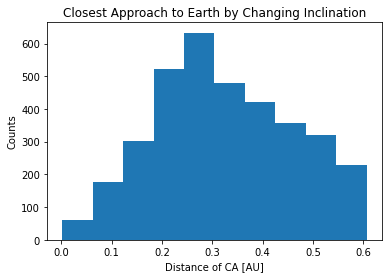

In [92]:
counts, bins = np.histogram(results)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Closest Approach to Earth by Changing Inclination')
plt.xlabel("Distance of CA [AU]")
plt.ylabel("Counts")
closest_approaches = ear_results_inc.tolist()[0]
len([i for i in results if i < 0.25]) / len(results)

In [1]:
%store -r ven_results_inc

In [7]:
ven_results_inc

array([[0.04061506, 1.32528249, 1.32363848, ..., 0.18050214, 0.17173214,
        0.16997626]])

In [9]:
ven_results = [i/2 if i <= 2 else i for i in ven_results_inc.tolist()[0]]

0.5371428571428571

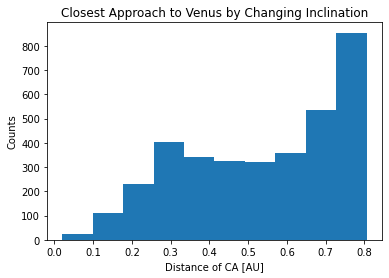

In [12]:
counts2, bins2 = np.histogram(ven_results)
plt.hist(bins2[:-1], bins2, weights=counts2)
plt.title('Closest Approach to Venus by Changing Inclination')
plt.xlabel("Distance of CA [AU]")
plt.ylabel("Counts")
len([i for i in ven_results if i < 0.6]) / len(ven_results)

0.008285714285714285

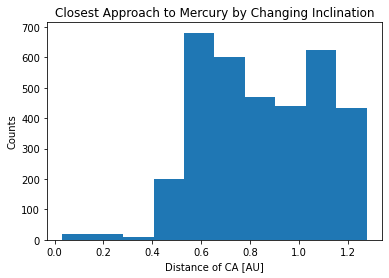

In [39]:
counts3, bins3 = np.histogram(mer_results_inc)
plt.hist(bins3[:-1], bins3, weights=counts3)
plt.title('Closest Approach to Mercury by Changing Inclination')
plt.xlabel("Distance of CA [AU]")
plt.ylabel("Counts")
closest_approaches3 = mer_results_inc.tolist()[0]
len([i for i in closest_approaches3 if i < 0.2]) / len(closest_approaches3)

###  Changing Omega

In [18]:
# Months and days at which to start simulation
months = range(6, 13)
days = range(1, 30, 3)

# Angles to iterate through
pi_angles = np.linspace(0, 2 * np.pi, 200)

# Number of days to run the simulation
Ndays = 12 * 35

# Arrays to save results
mer_results_Omega = np.zeros((1, 14000))
ven_results_Omega = np.zeros((1, 14000))
ear_results_Omega = np.zeros((1, 14000))


counter = 0
for month in months:
    for day in days:
        for i, inc in enumerate(pi_angles):
            if i == 0:
                # Initialize the simulation
                sim = rebound.Simulation()
                sim.units = ['AU', 'days', 'Msun']
                date = f'2017-{month}-{day} 00:00'
                sim.add('Sun', date=date)
                sim.add('Mercury', date=date)
                sim.add('Venus', date=date)
                sim.add('399', date=date)
                sim.add(
                    a=OUMUAMUA_ORBIT.a,
                    e=OUMUAMUA_ORBIT.e,
                    inc=inc,
                    Omega=OUMUAMUA_ORBIT.Omega,
                    omega=OUMUAMUA_ORBIT.omega,
                    f=OUMUAMUA_ORBIT.f
                )
            else:
                sim.remove(4)
                sim.add(
                    a=OUMUAMUA_ORBIT.a,
                    e=OUMUAMUA_ORBIT.e,
                    inc=inc,
                    Omega=OUMUAMUA_ORBIT.Omega,
                    omega=OUMUAMUA_ORBIT.omega,
                    f=OUMUAMUA_ORBIT.f
                )
            # Find and print closest approaches to each object
            approaches = find_closest_approach(sim, Ndays)
            print(f'Start: {date} | Inclination: {inc}')
            print(f'    Closest approach to Mercury: {approaches[0]}')
            print(f'    Closest approach to Venus: {approaches[1]}')
            print(f'    Closest approach to Earth: {approaches[2]}')
            print('')
            mer_results_Omega[0][counter] = approaches[0]
            ven_results_Omega[0][counter] = approaches[1]
            ear_results_Omega[0][counter] = approaches[2]

            counter += 1

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Target body name: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Target body name: Venus Barycenter (299).
Searching NASA Horizons for '399'... Found: Target body name: Earth (399).
Start: 2017-6-1 00:00 | Inclination: 0.0
    Closest approach to Mercury: 0.5295796987860475
    Closest approach to Venus: 0.04037147427000704
    Closest approach to Earth: 0.7563492030430018

Start: 2017-6-1 00:00 | Inclination: 0.03157379551346526
    Closest approach to Mercury: 1.1514002095946962
    Closest approach to Venus: 1.1140148601836626
    Closest approach to Earth: 1.805498289092208

Start: 2017-6-1 00:00 | Inclination: 0.06314759102693052
    Closest approach to Mercury: 1.1517357550961982
    Closest approach to Venus: 1.1134652958045645
    Closest approach to Earth: 1.8049716468597683

Start: 2017-6-1 00:00 | Inclination: 0.09472138654039577
  

    Closest approach to Mercury: 1.0130549202646313
    Closest approach to Venus: 0.919627520489418
    Closest approach to Earth: 1.5651214756234002

Start: 2017-6-1 00:00 | Inclination: 1.2313780250251452
    Closest approach to Mercury: 1.00539373469516
    Closest approach to Venus: 0.9097550607755629
    Closest approach to Earth: 1.55304602709163

Start: 2017-6-1 00:00 | Inclination: 1.2629518205386103
    Closest approach to Mercury: 0.9975601091995173
    Closest approach to Venus: 0.8996677104100996
    Closest approach to Earth: 1.540738959862868

Start: 2017-6-1 00:00 | Inclination: 1.2945256160520755
    Closest approach to Mercury: 0.9895578513155332
    Closest approach to Venus: 0.8893683861909975
    Closest approach to Earth: 1.5282070960398944

Start: 2017-6-1 00:00 | Inclination: 1.326099411565541
    Closest approach to Mercury: 0.9813909116952748
    Closest approach to Venus: 0.8788600852876359
    Closest approach to Earth: 1.5154575076480736

Start: 2017-6-1 00

Start: 2017-6-1 00:00 | Inclination: 2.683772618644547
    Closest approach to Mercury: 0.5659454776932186
    Closest approach to Venus: 0.29475054058385647
    Closest approach to Earth: 0.7526639900819273

Start: 2017-6-1 00:00 | Inclination: 2.715346414158012
    Closest approach to Mercury: 0.558172492333349
    Closest approach to Venus: 0.2810260058380233
    Closest approach to Earth: 0.7318000626297712

Start: 2017-6-1 00:00 | Inclination: 2.7469202096714773
    Closest approach to Mercury: 0.5507169288205215
    Closest approach to Venus: 0.2676338436886769
    Closest approach to Earth: 0.7114249506395336

Start: 2017-6-1 00:00 | Inclination: 2.7784940051849425
    Closest approach to Mercury: 0.5435994281791428
    Closest approach to Venus: 0.25464088547220537
    Closest approach to Earth: 0.6919814601345583

Start: 2017-6-1 00:00 | Inclination: 2.810067800698408
    Closest approach to Mercury: 0.5368406682823019
    Closest approach to Venus: 0.242125378849914
    Close

Start: 2017-6-1 00:00 | Inclination: 4.136167212263949
    Closest approach to Mercury: 0.6682797167833562
    Closest approach to Venus: 0.5597524818222859
    Closest approach to Earth: 1.1309970644193328

Start: 2017-6-1 00:00 | Inclination: 4.167741007777414
    Closest approach to Mercury: 0.6783980182761954
    Closest approach to Venus: 0.5742022359279212
    Closest approach to Earth: 1.1495062291060845

Start: 2017-6-1 00:00 | Inclination: 4.199314803290879
    Closest approach to Mercury: 0.6886015718222593
    Closest approach to Venus: 0.5885559977013336
    Closest approach to Earth: 1.1669056819002568

Start: 2017-6-1 00:00 | Inclination: 4.230888598804345
    Closest approach to Mercury: 0.6988766961965743
    Closest approach to Venus: 0.6028068248229803
    Closest approach to Earth: 1.182956088325161

Start: 2017-6-1 00:00 | Inclination: 4.26246239431781
    Closest approach to Mercury: 0.7092102617078683
    Closest approach to Venus: 0.6169481345039618
    Closest a

Start: 2017-6-1 00:00 | Inclination: 5.651709396910281
    Closest approach to Mercury: 1.0910907078003618
    Closest approach to Venus: 1.063325467587485
    Closest approach to Earth: 1.7364227917576658

Start: 2017-6-1 00:00 | Inclination: 5.683283192423747
    Closest approach to Mercury: 1.096191515642417
    Closest approach to Venus: 1.0683903703849187
    Closest approach to Earth: 1.7430884638147028

Start: 2017-6-1 00:00 | Inclination: 5.714856987937211
    Closest approach to Mercury: 1.1010794030809314
    Closest approach to Venus: 1.0731963171103809
    Closest approach to Earth: 1.7494296528992026

Start: 2017-6-1 00:00 | Inclination: 5.746430783450677
    Closest approach to Mercury: 1.1057523527163748
    Closest approach to Venus: 1.077742012248067
    Closest approach to Earth: 1.7554435874396501

Start: 2017-6-1 00:00 | Inclination: 5.7780045789641425
    Closest approach to Mercury: 1.1102084490195772
    Closest approach to Venus: 1.082026232035262
    Closest ap

Start: 2017-6-4 00:00 | Inclination: 0.7577710923231662
    Closest approach to Mercury: 1.1425862152691668
    Closest approach to Venus: 1.0788518026619354
    Closest approach to Earth: 1.7233172971059199

Start: 2017-6-4 00:00 | Inclination: 0.7893448878366315
    Closest approach to Mercury: 1.1377338013594231
    Closest approach to Venus: 1.072004465754383
    Closest approach to Earth: 1.7152369381882775

Start: 2017-6-4 00:00 | Inclination: 0.8209186833500968
    Closest approach to Mercury: 1.132669655648658
    Closest approach to Venus: 1.0648967974940933
    Closest approach to Earth: 1.7068593150814297

Start: 2017-6-4 00:00 | Inclination: 0.8524924788635619
    Closest approach to Mercury: 1.1273960079089582
    Closest approach to Venus: 1.057530707056382
    Closest approach to Earth: 1.6981884425716447

Start: 2017-6-4 00:00 | Inclination: 0.8840662743770272
    Closest approach to Mercury: 1.1219151987251452
    Closest approach to Venus: 1.0499081769676504
    Close

Start: 2017-6-4 00:00 | Inclination: 2.178591890429103
    Closest approach to Mercury: 0.7663747221832727
    Closest approach to Venus: 0.551717855052531
    Closest approach to Earth: 1.1453546361516789

Start: 2017-6-4 00:00 | Inclination: 2.210165685942568
    Closest approach to Mercury: 0.7562768018206035
    Closest approach to Venus: 0.536219029034701
    Closest approach to Earth: 1.125641689975802

Start: 2017-6-4 00:00 | Inclination: 2.241739481456033
    Closest approach to Mercury: 0.7462349342853966
    Closest approach to Venus: 0.5206412190610568
    Closest approach to Earth: 1.10517527223404

Start: 2017-6-4 00:00 | Inclination: 2.273313276969499
    Closest approach to Mercury: 0.7362616270046614
    Closest approach to Venus: 0.5049933647939266
    Closest approach to Earth: 1.0840814499881322

Start: 2017-6-4 00:00 | Inclination: 2.304887072482964
    Closest approach to Mercury: 0.7263698494079402
    Closest approach to Venus: 0.4892850943706045
    Closest appr

Start: 2017-6-4 00:00 | Inclination: 3.630986484048505
    Closest approach to Mercury: 0.5833275126126898
    Closest approach to Venus: 0.3246449914671192
    Closest approach to Earth: 0.8142096541188181

Start: 2017-6-4 00:00 | Inclination: 3.66256027956197
    Closest approach to Mercury: 0.5892876367702462
    Closest approach to Venus: 0.34009260907449607
    Closest approach to Earth: 0.8360295954219072

Start: 2017-6-4 00:00 | Inclination: 3.6941340750754352
    Closest approach to Mercury: 0.5956176804635375
    Closest approach to Venus: 0.3556699214239809
    Closest approach to Earth: 0.8580622125782991

Start: 2017-6-4 00:00 | Inclination: 3.7257078705889004
    Closest approach to Mercury: 0.6022997738655206
    Closest approach to Venus: 0.37134606177605284
    Closest approach to Earth: 0.8806574750311258

Start: 2017-6-4 00:00 | Inclination: 3.7572816661023656
    Closest approach to Mercury: 0.6093157872956105
    Closest approach to Venus: 0.38709435017443694
    Cl

Start: 2017-6-4 00:00 | Inclination: 5.114954873181372
    Closest approach to Mercury: 1.0137673953332749
    Closest approach to Venus: 0.9754227124086107
    Closest approach to Earth: 1.5963746355072634

Start: 2017-6-4 00:00 | Inclination: 5.146528668694837
    Closest approach to Mercury: 1.022049095490896
    Closest approach to Venus: 0.985126157228868
    Closest approach to Earth: 1.607715504726603

Start: 2017-6-4 00:00 | Inclination: 5.178102464208302
    Closest approach to Mercury: 1.0301751490577362
    Closest approach to Venus: 0.9945928954438864
    Closest approach to Earth: 1.6188138201090359

Start: 2017-6-4 00:00 | Inclination: 5.209676259721768
    Closest approach to Mercury: 1.0381412046469667
    Closest approach to Venus: 1.0038203185822296
    Closest approach to Earth: 1.6296635854599435

Start: 2017-6-4 00:00 | Inclination: 5.241250055235233
    Closest approach to Mercury: 1.04594306670382
    Closest approach to Venus: 1.0128058930777586
    Closest appr

Start: 2017-6-7 00:00 | Inclination: 0.0
    Closest approach to Mercury: 0.4407956900839462
    Closest approach to Venus: 0.12365698261778253
    Closest approach to Earth: 0.7494359325044458

Start: 2017-6-7 00:00 | Inclination: 0.03157379551346526
    Closest approach to Mercury: 1.2258472977766954
    Closest approach to Venus: 1.2064089941690241
    Closest approach to Earth: 1.8336550035001877

Start: 2017-6-7 00:00 | Inclination: 0.06314759102693052
    Closest approach to Mercury: 1.226289778866417
    Closest approach to Venus: 1.2059532101186476
    Closest approach to Earth: 1.8331476439943364

Start: 2017-6-7 00:00 | Inclination: 0.09472138654039577
    Closest approach to Mercury: 1.2265026182079897
    Closest approach to Venus: 1.2052031162172283
    Closest approach to Earth: 1.8323024671354735

Start: 2017-6-7 00:00 | Inclination: 0.12629518205386103
    Closest approach to Mercury: 1.2264857232073736
    Closest approach to Venus: 1.2041589110621154
    Closest appro

Start: 2017-6-7 00:00 | Inclination: 1.2629518205386103
    Closest approach to Mercury: 1.0805051855850614
    Closest approach to Venus: 0.9787476387355074
    Closest approach to Earth: 1.579818330863975

Start: 2017-6-7 00:00 | Inclination: 1.2945256160520755
    Closest approach to Mercury: 1.0728713381768422
    Closest approach to Venus: 0.9676695967986059
    Closest approach to Earth: 1.567868909760465

Start: 2017-6-7 00:00 | Inclination: 1.326099411565541
    Closest approach to Mercury: 1.0650835645884034
    Closest approach to Venus: 0.9563624689017008
    Closest approach to Earth: 1.5557190174685587

Start: 2017-6-7 00:00 | Inclination: 1.357673207079006
    Closest approach to Mercury: 1.0571463129066905
    Closest approach to Venus: 0.9448295065932969
    Closest approach to Earth: 1.5433761753155382

Start: 2017-6-7 00:00 | Inclination: 1.3892470025924712
    Closest approach to Mercury: 1.0490641931860025
    Closest approach to Venus: 0.9330740480116919
    Closes

KeyboardInterrupt: 